## First Tests

In [1]:
%load_ext autoreload
%autoreload 2

In [161]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
import math
import pandas as pd
from time import sleep
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
#import pandas as pd
import seaborn as sns

In [4]:
init_notebook_mode(True)

In [5]:
from subprocess import call
import json
import plotly.utils
from plotly.offline import iplot, plot
from sys import getsizeof
import pickle as pkl

In [6]:
from mu2e.tools.fiteval import get_mag_field_function
import odespy
from mu2e.tools.particletransport import ElectronSwimmer

In [7]:
savedir = '/home/ckampa/Plots/FieldFitting/'

In [8]:
df_ds = DataFrameMaker(mu2e_ext_path+'datafiles/Mau13/Mu2e_DSMap_V13',input_type = 'pkl').data_frame

recreating fit with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=10, ms_c1=50, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=None, bs_bounds=None, version=1000)
Elapsed time was 1.24163 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 0
    # data points      = 46560
    # variables        = 0
    chi-square         = 764307.395
    reduced chi-square = 16.4155368
    Akaike info crit   = 130285.508
    Bayesian info crit = 130285.508
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   10 (fixed)
    ms_c1:     50 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:  -74613.8 (fixed)
    Bc1_0_0:   13334 (fixed)
    Dc1_0:     0.9452835 (fixed)
    Ac1_0_1:  -439.0484 (fixed)
    Bc1_0_

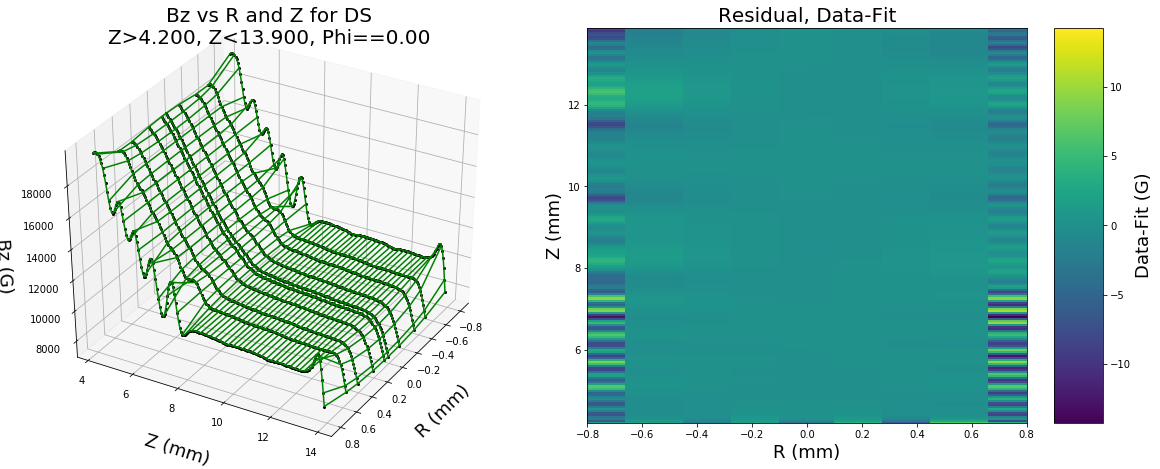

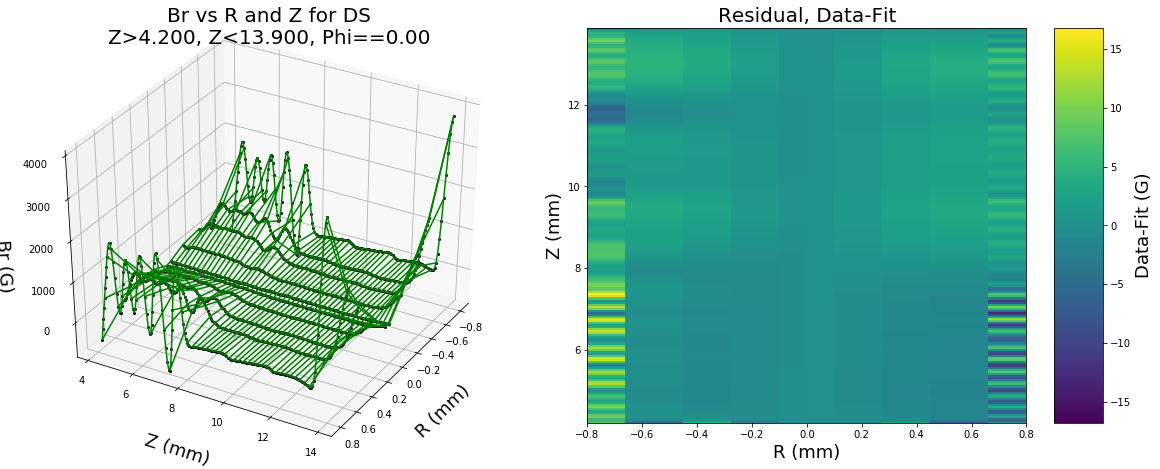

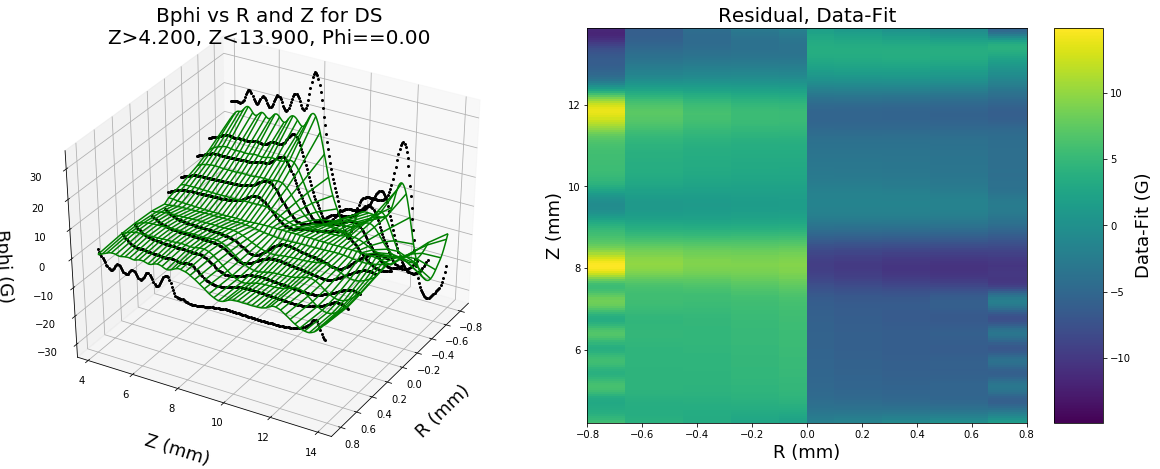

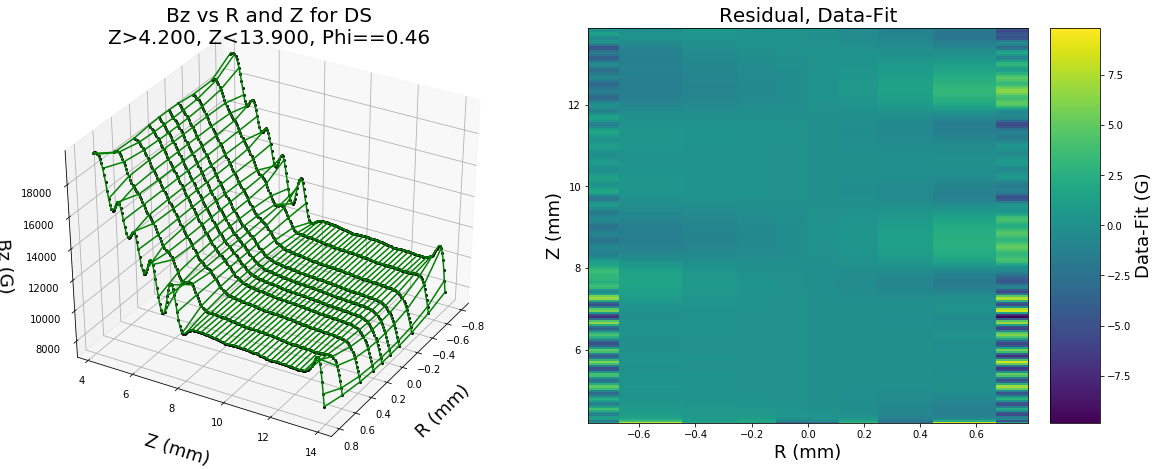

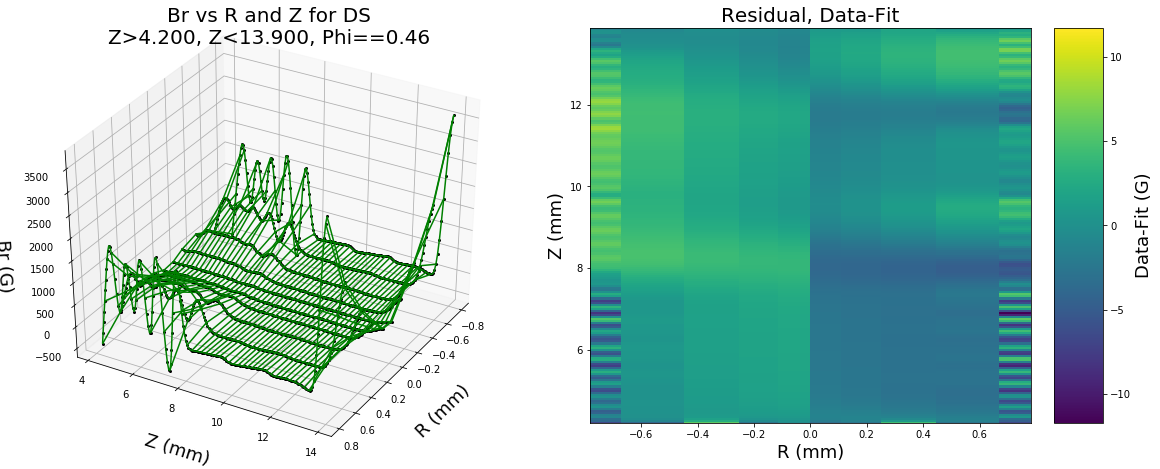

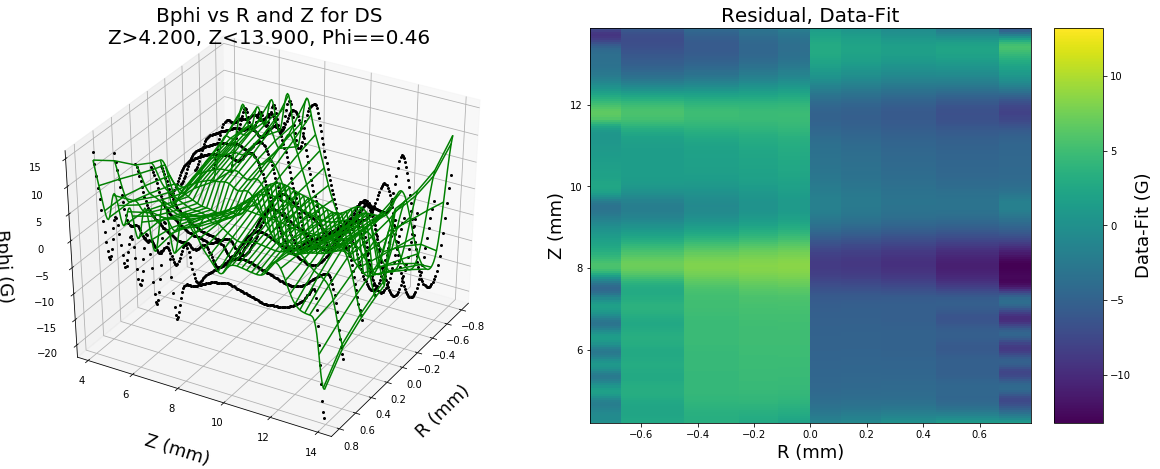

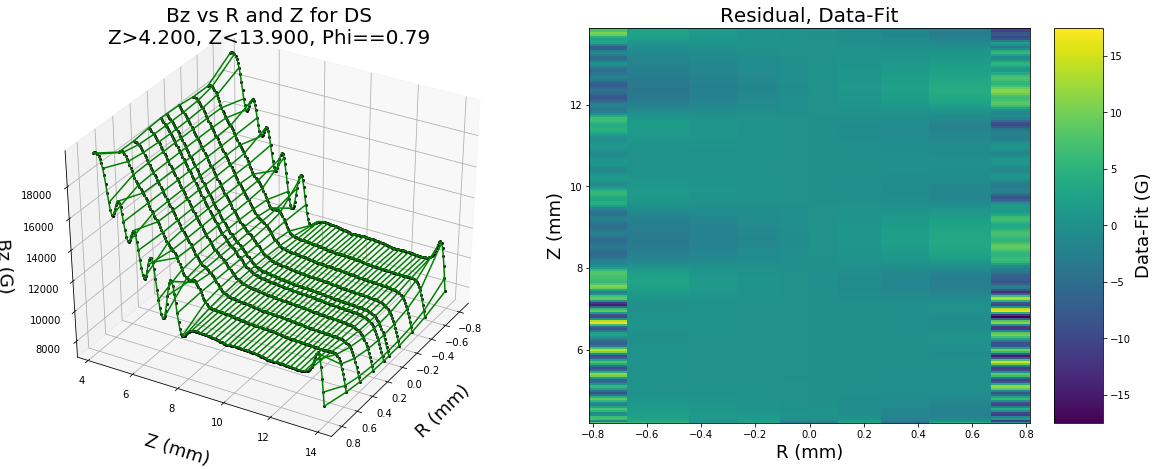

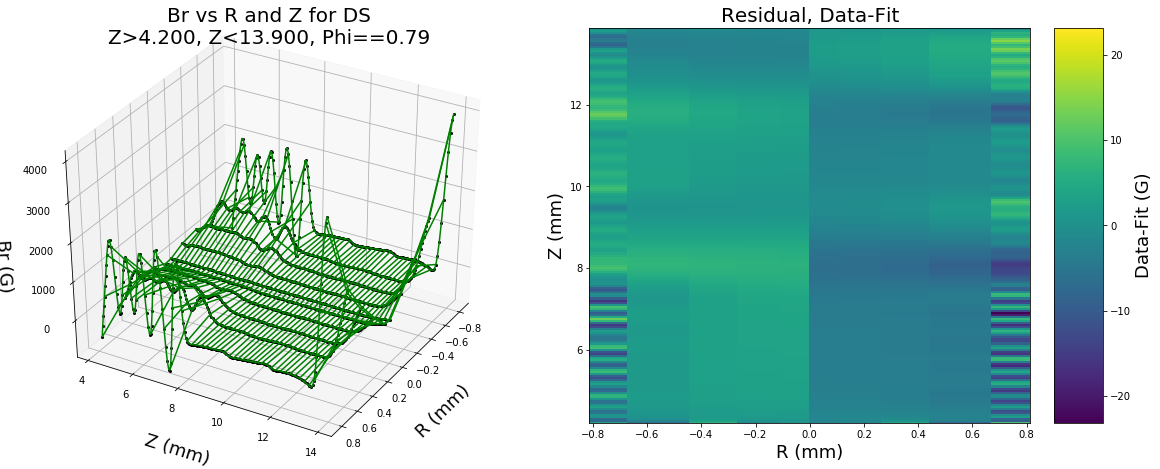

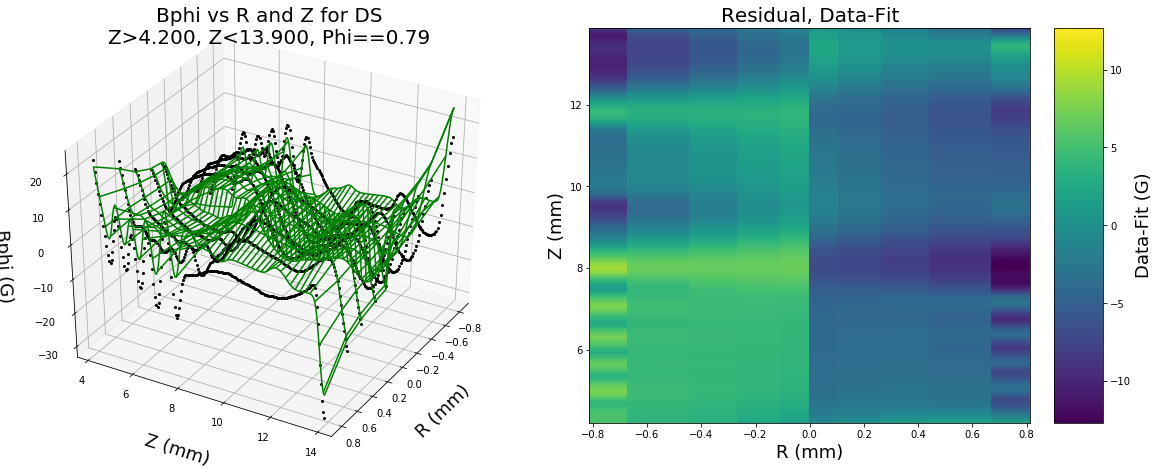

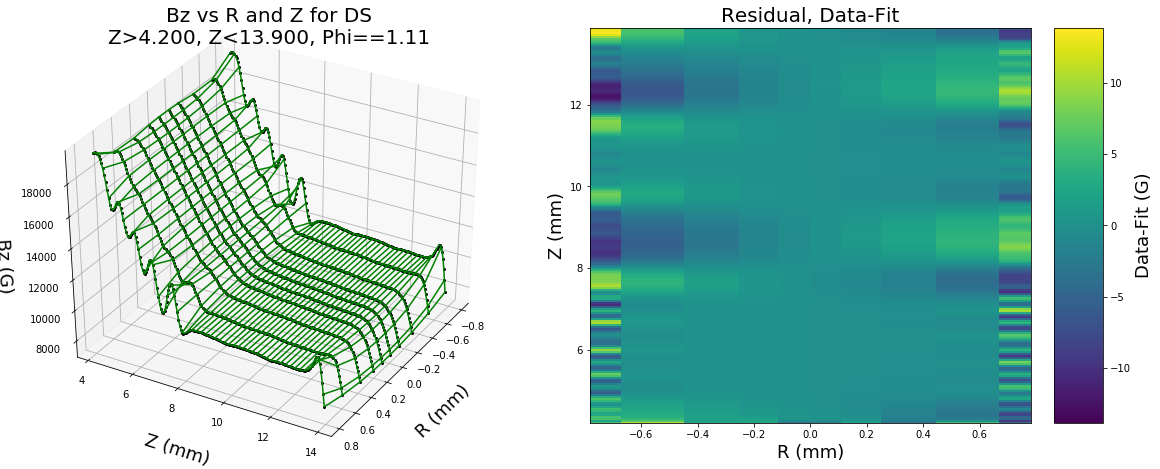

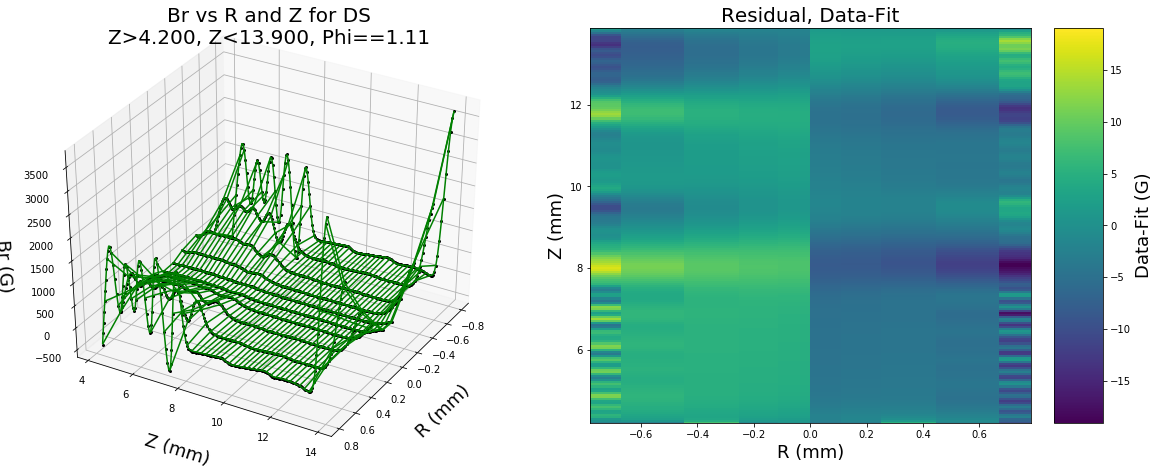

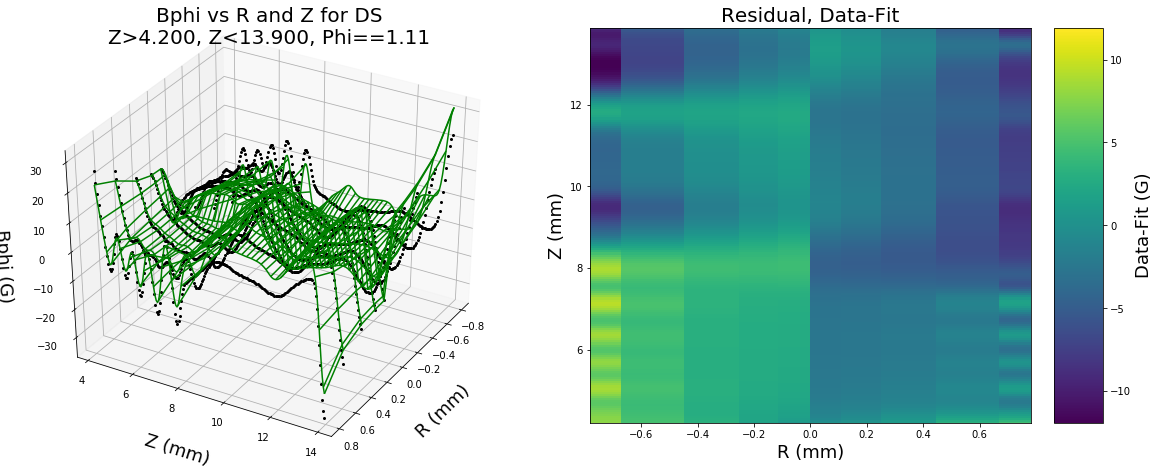

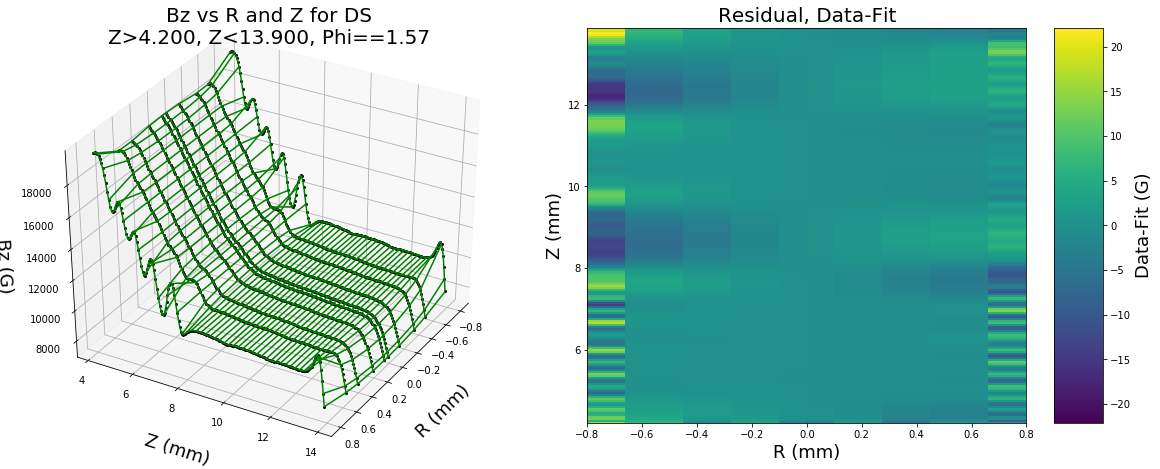

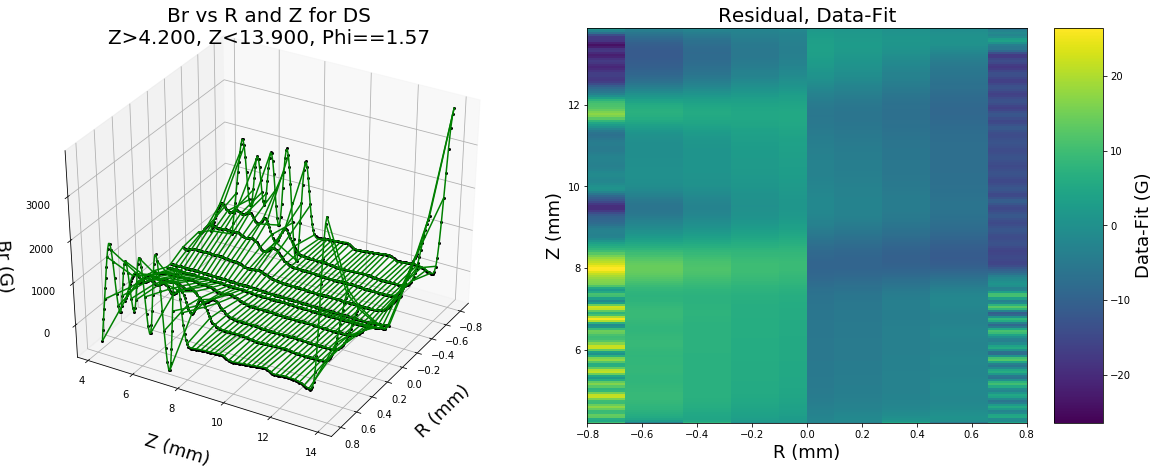

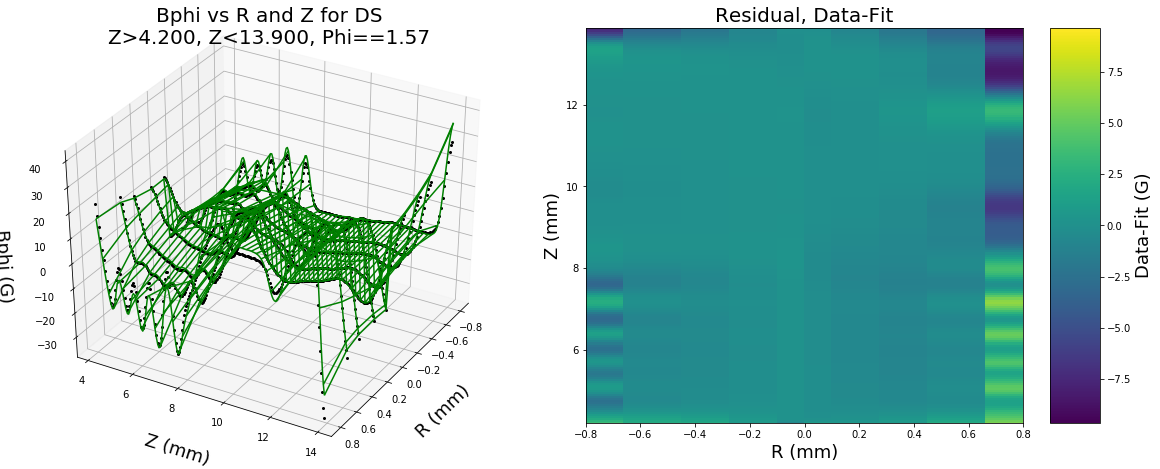

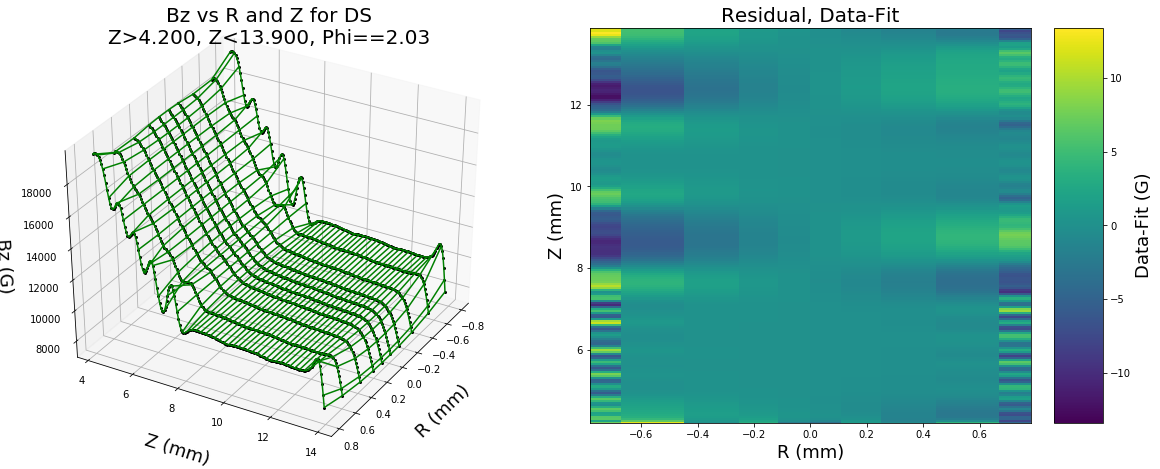

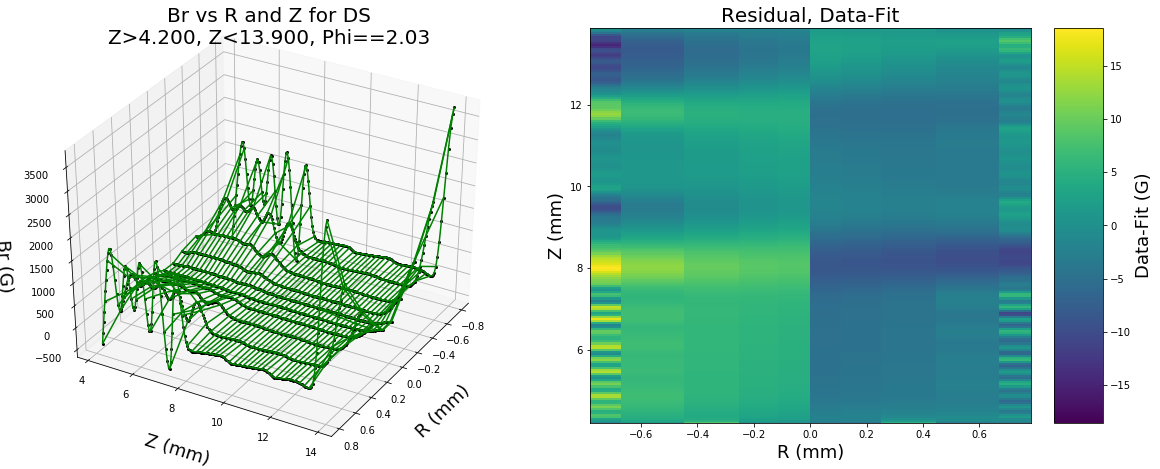

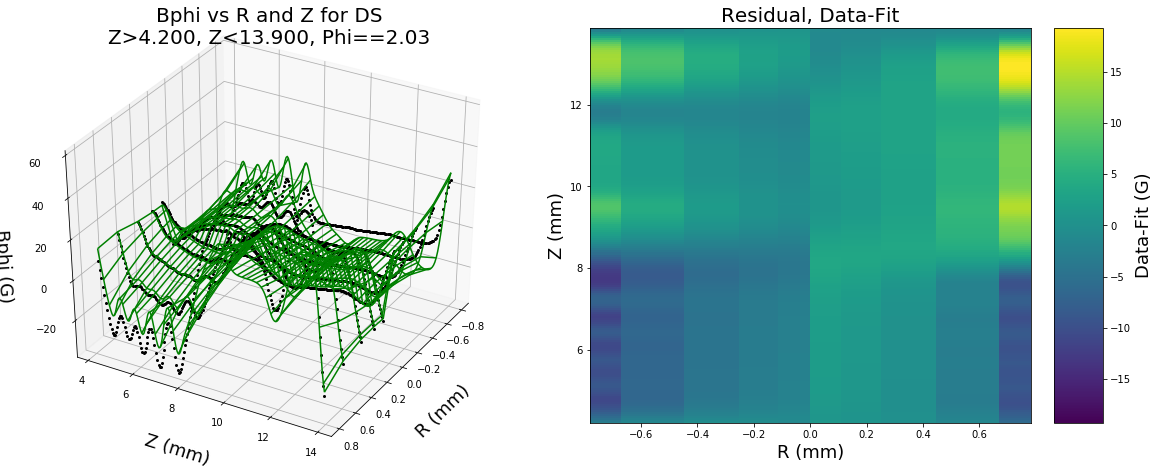

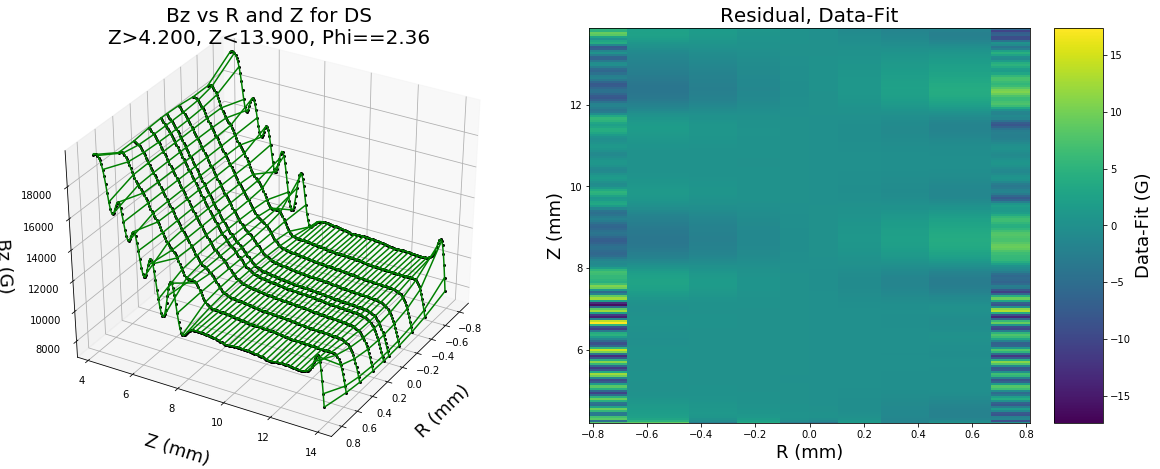

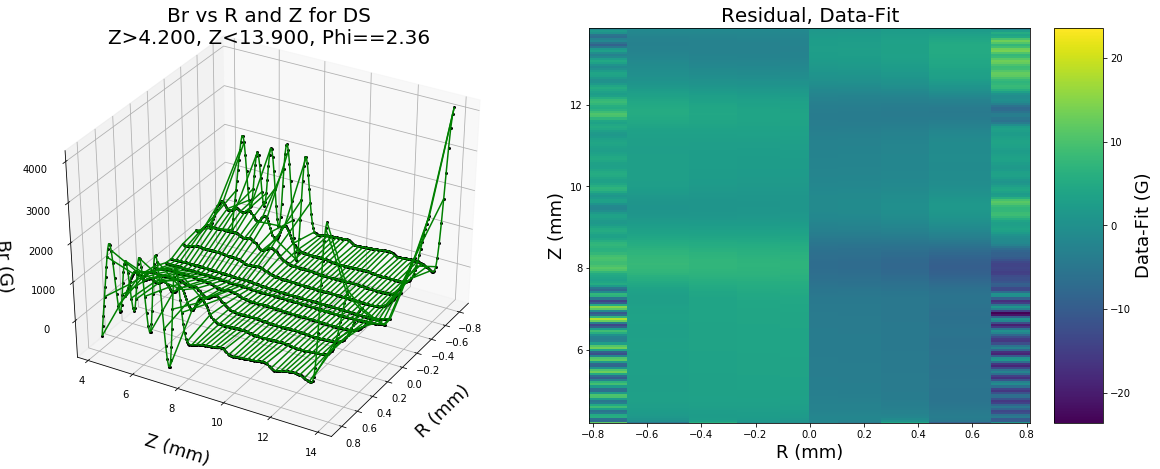

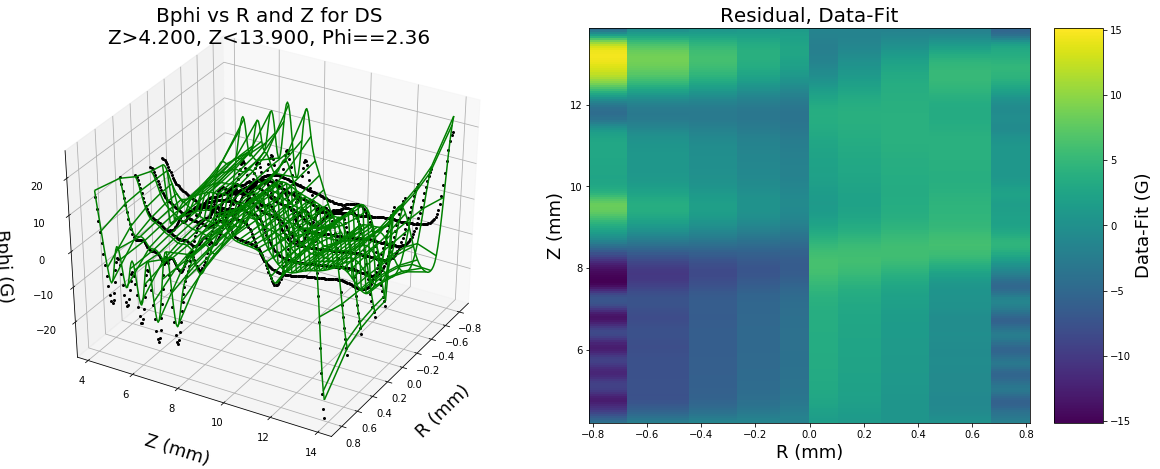

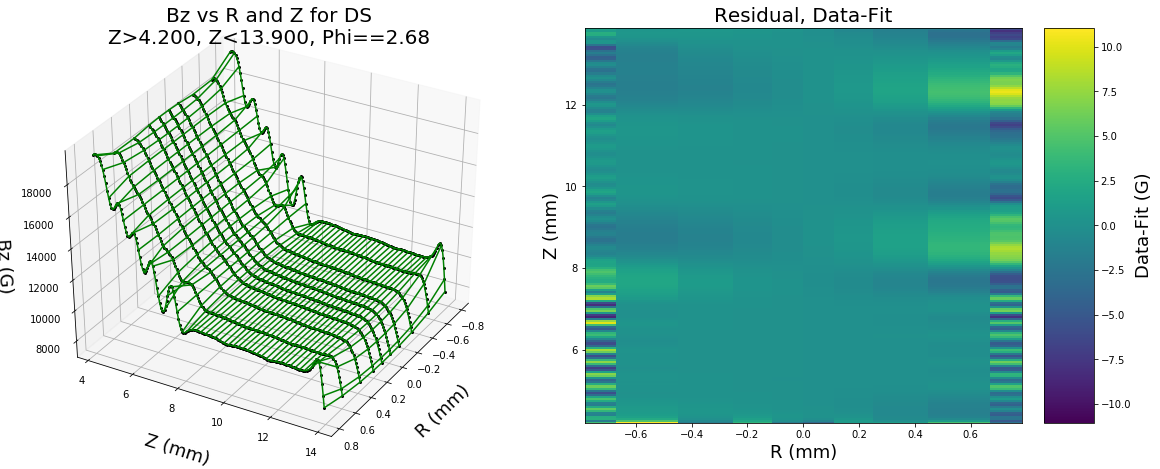

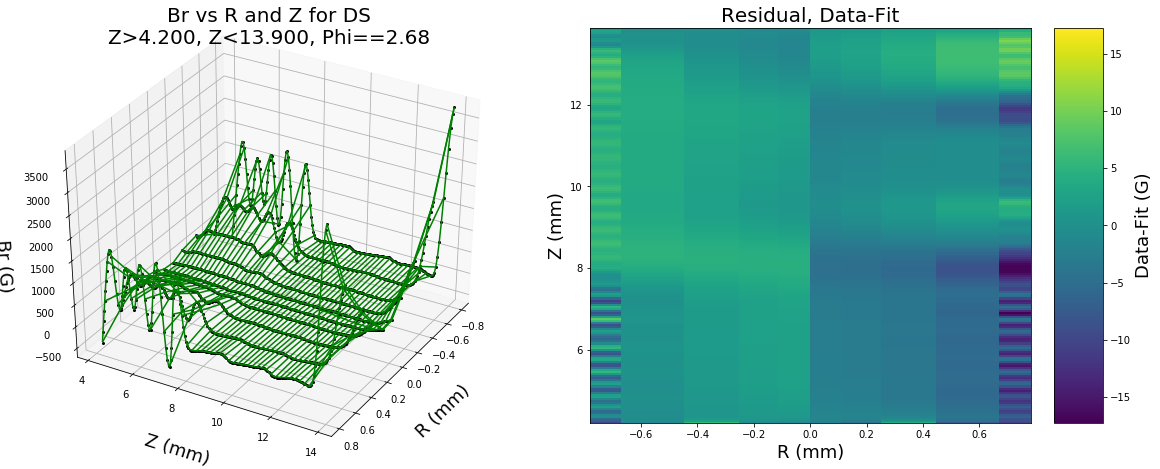

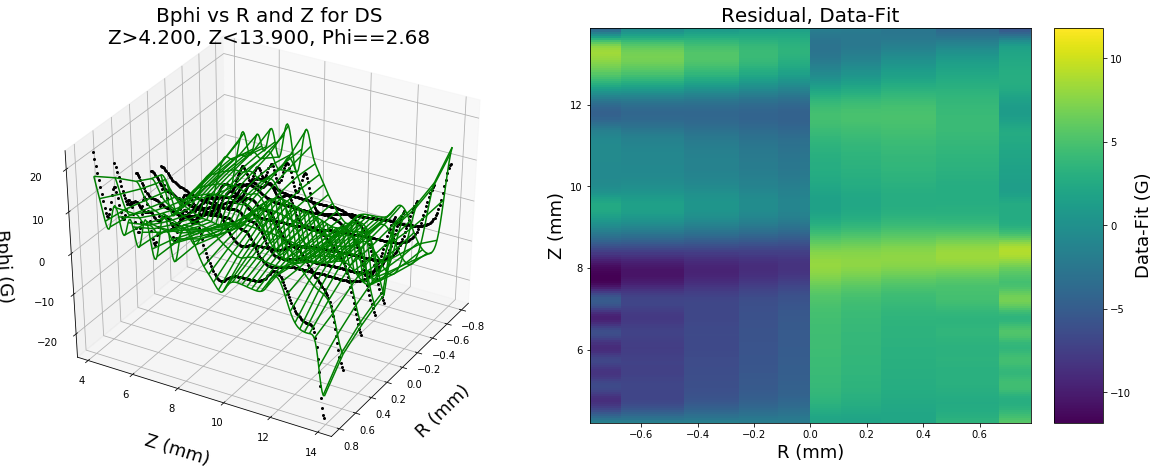

In [9]:
cfg_pickle_Opt = cfg_pickle(use_pickle=True, save_pickle=False,
                            load_name='Mau13traj', save_name='Mau13traj', recreate=True) 
                            #load_name='Mau13_cyl_py3', save_name='solA_val', recreate=True)
'''
cfg_params_Opt  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0, ms_c1=0, ns_c1=0,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':768},
                                 bs_tuples=((0.25, 0, -46),
                                            (0.25, 0, 46)),
                                 bs_bounds=(0.1, 0.1, 5),
                                 version=1000)
'''
hmd, ff = field_map_analysis('fma_ds_cyl_test', cfg_data_DS_Mau13,
                             cfg_geom_cyl_800mm_long, cfg_params_DS_Mau13,
                             cfg_pickle_Opt, cfg_plot_mpl)
                             #cfg_pickle_Opt, cfg_plot_none)

### Fiteval method
- Works, but is very difficult to use with any variation in model

In [10]:
# testing pkl of the model for quick calculations
# doesn't seem to work! brzphi_3d_producer_giant_function not pickleable
#pkl.dump(ff.result.eval, open( mu2e_ext_path+"models/Mau13_cyl_test.p", "wb" ) )

In [11]:
phis = df_ds.Phi.unique()

In [12]:
phis = df_ds.round({"Phi":2}).Phi.unique()

In [13]:
len(phis)

618

In [10]:
#mag_field_function = get_mag_field_function('Mau13_cyl_py3')
mag_field_function = get_mag_field_function('Mau13traj')

In [138]:
%timeit mag_field_function(-0.7,-0.7,5.5,cart=True)

2.56 ms ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
mag_field_function(-0.7,-0.7,5.5,cart=True)

(-2762.0848481780645, -2769.886605541462, 13315.667514127275)

In [15]:
ff.merge_data_fit_res

<bound method FieldFitter.merge_data_fit_res of <mu2e.fieldfitter_redux2.FieldFitter object at 0x7f52bcac1f28>>

In [16]:
ff.input_data

X      Y       Z           Bx           By            Bz  \
2450309  0.000 -0.025   4.221   -12.869706   -30.438903  18937.287207   
2501367  0.025  0.000   4.221    14.995168    -2.232945  18937.294685   
2451351  0.000  0.025   4.221   -12.700502    25.487139  18937.071379   
2400293 -0.025  0.000   4.221   -40.591427    -2.735825  18937.059659   
2399772 -0.025 -0.025   4.221   -40.665222   -30.675983  18936.497939   
2500846  0.025 -0.025   4.221    14.896179   -30.167446  18936.716465   
2501888  0.025  0.025   4.221    15.047466    25.709176  18936.512779   
2400814 -0.025  0.025   4.221   -40.477229    25.212504  18936.269527   
2349235 -0.050 -0.025   4.221   -68.361348   -30.878510  18934.343316   
2399251 -0.025 -0.050   4.221   -40.697675   -58.478261  18934.565890   
2500325  0.025 -0.050   4.221    14.748849   -57.962833  18934.759280   
2551383  0.050 -0.025   4.221    42.499072   -29.859204  18934.753986   
2552425  0.050  0.025   4.221    42.633272    25.876606  18934.561758   
2502409  0.025  0.050   4.221    15.051090    53.527393  18934.352143   
2401335 -0.025  0.050   4.221   -40.321968    53.039267  18934.109220   
2350277 -0.050  0.025   4.221   -68.153681    24.884252  18934.101457   
2146045 -0.150 -0.075   4.221  -173.857249   -84.666816  18904.775868   
2296093 -0.075 -0.150   4.221   -93.641296  -164.120014  18905.222427   
2599315  0.075 -0.150   4.221    66.419174  -162.286478  18905.184332   
2752489  0.150 -0.075   4.221   146.039301   -81.304276  18904.897536   
2755615  0.150  0.075   4.221   146.259654    79.107764  18904.442121   
2605567  0.075  0.150   4.221    67.114695   159.008727  18904.104410   
2302345 -0.075  0.150   4.221   -92.281244   157.879903  18903.696013   
2149171 -0.150  0.075   4.221  -172.971843    76.421444  18903.869873   
2447183  0.000 -0.175   4.221   -13.527699  -189.043354  18902.096653   
2804589  0.175  0.000   4.221   171.583129    -0.928100  18901.397144   
2454477  0.000  0.175   4.221   -12.361019   184.471070  18900.600342   
2097071 -0.175  0.000   4.221  -199.481273    -4.483108  18901.100287   
2195540 -0.125 -0.125   4.221  -146.450886  -137.182216  18901.088690   
2700910  0.125 -0.125   4.221   118.643524  -134.168253  18900.990632   
...        ...    ...     ...          ...          ...           ...   
2462157  0.000  0.525  13.871    20.432170  1850.321782   7492.630785   
1389939 -0.525  0.000  13.871 -1818.276400    11.120787   7471.906217   
1685346 -0.375 -0.375  13.871 -1299.339572 -1313.461816   7491.607910   
3201456  0.375 -0.375  13.871  1354.347264 -1333.799323   7513.993451   
3217086  0.375  0.375  13.871  1357.162398  1331.174165   7514.186861   
1700976 -0.375  0.375  13.871 -1303.432527  1327.479896   7479.699769   
1435266 -0.500 -0.250  13.871 -1776.358529  -889.542552   7524.933633   
1935426 -0.250 -0.500  13.871  -880.630355 -1799.152221   7536.596061   
2946166  0.250 -0.500  13.871   929.471518 -1815.739523   7550.815891   
3456746  0.500 -0.250  13.871  1844.671162  -912.960517   7557.430203   
3467166  0.500  0.250  13.871  1847.048828   908.361796   7557.816542   
2967006  0.250  0.500  13.871   932.501859  1814.713698   7550.136090   
1956266 -0.250  0.500  13.871  -884.114766  1808.106124   7525.343409   
1445686 -0.500  0.250  13.871 -1780.101764   909.242967   7513.970893   
1028886 -0.700 -0.350  13.871 -3249.765478 -1628.568749   7896.319431   
1729110 -0.350 -0.700  13.871 -1623.348371 -3298.852302   7914.107931   
3144146  0.350 -0.700  13.871  1702.788270 -3348.804253   7929.081905   
3858958  0.700 -0.350  13.871  3400.873721 -1689.331957   7935.764814   
3873546  0.700  0.350  13.871  3406.389471  1679.010592   7935.836856   
3173322  0.350  0.700  13.871  1712.262944  3344.680079   7927.615361   
1758286 -0.350  0.700  13.871 -1625.206242  3307.408454   7885.729233   
1043474 -0.700  0.350  13.871 -3253.891317  1654.851823   7867.738154   
2434544  0.000 -0.800  13.871    28.966740 -3917.868006   7949.618215  

In [16]:
br,bphi,bz=mag_field_function(0.025000,-1.570796, 4.221)

In [18]:
df_test = ff.input_data

In [20]:
resbr,resbphi,resbz = [],[],[]
for row in df_test.itertuples():
    br,bphi,bz = mag_field_function(row.R,row.Phi,row.Z)
    resbr.append(row.Br_fit-br)
    resbphi.append(row.Bphi_fit-bphi)
    resbz.append(row.Bz_fit-bz)
    #print(row.Br_fit-br,row.Bphi_fit-bphi,row.Bz_fit-bz)

KeyboardInterrupt: 

In [ ]:
count,bins,patches = plt.hist(resbr,bins=100);
plt.hist(resbphi,bins=bins,histtype='step');
plt.hist(resbz,bins=bins,histtype='step');

In [82]:
resbr = np.array(resbr)
resbphi = np.array(resbphi)
resbz = np.array(resbz)

In [83]:
resbr.std(),resbphi.std(),resbz.std()

(3.073616110141083e-10, 1.4985093704796861e-10, 2.712391660068849e-10)

### New method: result.eval

In [11]:
def mag_calc_func(a,b,z,cart=True):
    '''Returns 
    cart==True: (bx,by,bz)
    cart==False: (br,bphi,bz)
    units: input for x,y,z,r mm
    output: bfield in Tesla
    '''
    if type(a) == pd.core.series.Series:
        a = a.values
        b = b.values
        z = z.values
    '''
    if (type(a) == float) or (type(a) == np.float64) or (type(a) == int):
        a = np.array([a])
        b = np.array([b])
        z = np.array([z])
    if (type(a) == list):
        a = np.array(a)
        b = np.array(b)
        z = np.array(z)
    '''
    if (type(a) != np.array):
        a = np.array([a]).flatten()
        b = np.array([b]).flatten()
        z = np.array([z]).flatten()
        
    if cart:
        r = np.sqrt(a**2+b**2)
        phi = np.arctan2(b,a)
    else:
        r = a
        phi = b
    
    r = r/1000.
    z = z/1000.
    
    br,bz,bphi = (ff.result.eval(r=r,phi=phi,z=z)).reshape(3,-1)#/1e4
    br = np.nan_to_num(br)/1e4
    bz = np.nan_to_num(bz)/1e4
    bphi = np.nan_to_num(bphi)/1e4
    #br = br/1e4
    #bphi = bphi/1e4
    #bz = bz/1e4
    if cart:
        bx = br*np.cos(phi)-bphi*np.sin(phi)
        by = br*np.sin(phi)+bphi*np.cos(phi)
        try:
            bx = float(bx)
            by = float(by)
            bz = float(bz)
        except:
            pass
        #print(bx,by,bz)
        return (bx,by,bz)
    else:
        try:
            br = float(bx)
            bphi = float(by)
            bz = float(bz)
        except:
            pass
        return (br,bphi,bz)
    

In [12]:
def fast_mag_calc_func(x,y,z,cart=True):
    x = np.array([x])
    y = np.array([y])
    z = np.array([z])
    
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    
    r = r/1000.
    z = z/1000.
    
    br,bz,bphi = np.nan_to_num(ff.result.eval(r=r,phi=phi,z=z))/1e4

    bx = br*math.cos(phi)-bphi*math.sin(phi)
    by = br*math.sin(phi)+bphi*math.cos(phi)    
    
    return (bx,by,bz)

In [13]:
df_fit = ff.input_data.reset_index(drop=True)

In [280]:
#df = df_ds
df = df_fit#[0:10]#.sample(1000000)
#df['X'] = df['X']*1000.
#df['Y'] = df['Y']*1000.
#df['Z'] = df['Z']*1000.
#df['R'] = df['R']*1000.
#X = df.X.values
#Y = df.Y.values
#Z = df.Z.values
#bx,by,bz = mag_calc_func(df.X,df.Y,df.Z,cart=True)
br,bphi,bz = mag_calc_func(df.R,df.Phi,df.Z,cart=False)

In [15]:
%time br,bphi,bz = mag_calc_func(df.R,df.Phi,df.Z,cart=False)

CPU times: user 338 ms, sys: 15.2 ms, total: 353 ms
Wall time: 62.1 ms


In [281]:
len(df)

4902089

In [17]:
#br,bz,bphi = fullcalc.reshape(3,-1)

In [18]:
# for bx,by,bz
#df['Bx_fit2'] = pd.Series(bx)
#df['By_fit2'] = pd.Series(by)
#df['Bz_fit2'] = pd.Series(bz)
#df['Br_fit2'] = df['Bx_fit2']*np.cos(df.Phi) + df['By_fit2']*np.sin(df.Phi)
#df['Bphi_fit2'] = -df['Bx_fit2']*np.sin(df.Phi) + df['By_fit2']*np.cos(df.Phi)

In [282]:
df['Br_fit2'] = pd.Series(br)
df['Bphi_fit2'] = pd.Series(bphi)
df['Bz_fit2'] = pd.Series(bz)

In [20]:
df

X      Y       Z           Bx           By            Bz         R  \
0      0.000 -0.025   4.221   -12.869706   -30.438903  18937.287207  0.025000   
1      0.025  0.000   4.221    14.995168    -2.232945  18937.294685  0.025000   
2      0.000  0.025   4.221   -12.700502    25.487139  18937.071379  0.025000   
3     -0.025  0.000   4.221   -40.591427    -2.735825  18937.059659  0.025000   
4     -0.025 -0.025   4.221   -40.665222   -30.675983  18936.497939  0.035355   
5      0.025 -0.025   4.221    14.896179   -30.167446  18936.716465  0.035355   
6      0.025  0.025   4.221    15.047466    25.709176  18936.512779  0.035355   
7     -0.025  0.025   4.221   -40.477229    25.212504  18936.269527  0.035355   
8     -0.050 -0.025   4.221   -68.361348   -30.878510  18934.343316  0.055902   
9     -0.025 -0.050   4.221   -40.697675   -58.478261  18934.565890  0.055902   
10     0.025 -0.050   4.221    14.748849   -57.962833  18934.759280  0.055902   
11     0.050 -0.025   4.221    42.499072   -29.859204  18934.753986  0.055902   
12     0.050  0.025   4.221    42.633272    25.876606  18934.561758  0.055902   
13     0.025  0.050   4.221    15.051090    53.527393  18934.352143  0.055902   
14    -0.025  0.050   4.221   -40.321968    53.039267  18934.109220  0.055902   
15    -0.050  0.025   4.221   -68.153681    24.884252  18934.101457  0.055902   
16    -0.150 -0.075   4.221  -173.857249   -84.666816  18904.775868  0.167705   
17    -0.075 -0.150   4.221   -93.641296  -164.120014  18905.222427  0.167705   
18     0.075 -0.150   4.221    66.419174  -162.286478  18905.184332  0.167705   
19     0.150 -0.075   4.221   146.039301   -81.304276  18904.897536  0.167705   
20     0.150  0.075   4.221   146.259654    79.107764  18904.442121  0.167705   
21     0.075  0.150   4.221    67.114695   159.008727  18904.104410  0.167705   
22    -0.075  0.150   4.221   -92.281244   157.879903  18903.696013  0.167705   
23    -0.150  0.075   4.221  -172.971843    76.421444  18903.869873  0.167705   
24     0.000 -0.175   4.221   -13.527699  -189.043354  18902.096653  0.175000   
25     0.175  0.000   4.221   171.583129    -0.928100  18901.397144  0.175000   
26     0.000  0.175   4.221   -12.361019   184.471070  18900.600342  0.175000   
27    -0.175  0.000   4.221  -199.481273    -4.483108  18901.100287  0.175000   
28    -0.125 -0.125   4.221  -146.450886  -137.182216  18901.088690  0.176777   
29     0.125 -0.125   4.221   118.643524  -134.168253  18900.990632  0.176777   
...      ...    ...     ...          ...          ...           ...       ...   
15490  0.000  0.525  13.871    20.432170  1850.321782   7492.630785  0.525000   
15491 -0.525  0.000  13.871 -1818.276400    11.120787   7471.906217  0.525000   
15492 -0.375 -0.375  13.871 -1299.339572 -1313.461816   7491.607910  0.530330   
15493  0.375 -0.375  13.871  1354.347264 -1333.799323   7513.993451  0.530330   
15494  0.375  0.375  13.871  1357.162398  1331.174165   7514.186861  0.530330   
15495 -0.375  0.375  13.871 -1303.432527  1327.479896   7479.699769  0.530330   
15496 -0.500 -0.250  13.871 -1776.358529  -889.542552   7524.933633  0.559017   
15497 -0.250 -0.500  13.871  -880.630355 -1799.152221   7536.596061  0.559017   
15498  0.250 -0.500  13.871   929.471518 -1815.739523   7550.815891  0.559017   
15499  0.500 -0.250  13.871  1844.671162  -912.960517   7557.430203  0.559017   
15500  0.500  0.250  13.871  1847.048828   908.361796   7557.816542  0.559017   
15501  0.250  0.500  13.871   932.501859  1814.713698   7550.136090  0.559017   
15502 -0.250  0.500  13.871  -884.114766  1808.106124   7525.343409  0.559017   
15503 -0.500  0.250  13.871 -1780.101764   909.242967   7513.970893  0.559017   
15504 -0.700 -0.350  13.871 -3249.765478 -1628.568749   7896.319431  0.782624   
15505 -0.350 -0.700  13.871 -1623.348371 -3298.852302   7914.107931  0.782624   
15506  0.350 -0.700  13.871  1702.788270 -3348.804253   7929.081905  0.782624   
15507  0.700 -0.350  13.871  3400.873721 -

In [283]:
df['Res_Br'] = pd.Series([row.Br - row.Br_fit2*1e4 for row in df.itertuples()])
df['Res_Bphi'] = pd.Series([row.Bphi - row.Bphi_fit2*1e4 for row in df.itertuples()])
df['Res_Bz'] = pd.Series([row.Bz - row.Bz_fit2*1e4 for row in df.itertuples()])

IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 201

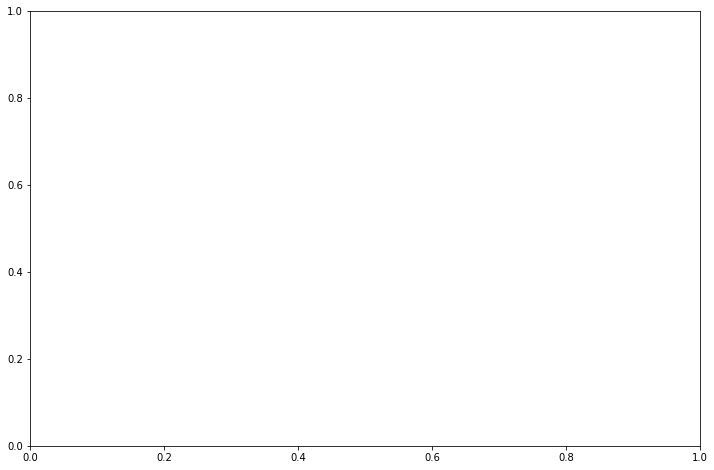

In [284]:
#plt.hist(df.Br_fit - df.Br_fit2*1e4, bins=200,log=True,range=[-.1,.1]);
plt.hist(df.Res_Br, bins=200,log=True);

In [148]:
len(df_ds)

4902089

In [28]:
type(df_ds.X) == pd.core.series.Series

True

In [34]:
mag_calc_func(.1,0,5000,True) == mag_calc_func(.1,0,5000,cart=True)

True

In [38]:
%timeit mag_calc_func(.1,0,5000,True)

1.79 ms ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [149]:
%timeit fast_mag_calc_func(.1,0,5000,True)

2.03 ms ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
type([1.5]*2)

list

In [104]:
pos = np.array([0,0,6000])
mom = np.array([10,60,10])
timesteps = np.linspace(0,4e-8,10000)

### Testing odespy with constant field and collinear velocity (straight line motion)

In [23]:
from mu2e.tools.particletransport import ElectronSwimmer
c = 299792458000
#from mu2e.tools.particletransport_m import ElectronSwimmer
#c = 299792458

In [24]:
def const_mag_calc_func(r,phi,z,cart=True):
    return (0,0,1.)
    #return (0.0004113891833288895, 0.0, 1.175001430329747)
def lin_mag_calc_func(x,y,z,cart=True):
    return (0,0,0.01*abs(x))

In [41]:
%timeit lin_mag_calc_func(200,0,0)

131 ns ± 1.03 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [147]:
%timeit const_mag_calc_func(0,0,6000)

59.9 ns ± 0.697 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [114]:
%timeit mag_calc_func(0.,0.,6000.)

1.79 ms ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [115]:
%timeit fast_mag_calc_func(0.,0.,6000.)

1.74 ms ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [136]:
# test with real example from offline G4
#pos = np.array([-3935.3+3904, -15.5, 6004.4])
#mom = np.array([91.2,-40.8,32.1])
#mom = np.array([90.6,-40.2,32.1]) # scaling momentum down by ~ .3 MeV to mimic energy loss


pos = np.array([-29.47, -54.59, -3944.4+10200.]) # another test muon stop
##pos = np.array([0,0,6000]) # mm
#pos = np.array([0,0,6]) # m 
##mom = np.array([15,104,0]) # not working
#mom = np.array([10,60,10])
#mom = np.array([0,0,105]) # now works when not starting on axis...fine since hole in stopping target
#mom = np.array([0,32,100]) # works
#mom = np.array([0,74,74]) # works
#mom = np.array([0,74,-74]) # works but exits towards TS
mom = np.array([55,74,-50]) # works but exits towards TS
#mom = np.array([0,32,-100]) # works, should be cusp of 10% backward going
##mom = np.array([0,20,-103]) # doesn't work
#timesteps = np.linspace(0,4e-8,30000)
#timesteps = np.linspace(0,4e-8,400)
#timesteps = np.linspace(0,1e-9,100)
#timesteps = np.linspace(0,1e-8,1000)
timesteps = np.linspace(0,4e-8,4000)

In [137]:
swimmer_fiteval = ElectronSwimmer(mom,pos,mag_field_function,timesteps,'Dop853')
swimmer_ff = ElectronSwimmer(mom,pos,fast_mag_calc_func,timesteps,'Dop853')

In [121]:
#%time swimmer_fiteval.solve()

In [138]:
%time swimmer_ff.solve()

swimming electron with [ 55  74 -50] MeV, starting at [ -29.47  -54.59 6255.6 ] mm, for 4e-08 s
Dop853 terminated at t=1.6124e-08
init energy: 104.88689680306281 MeV
final energy: 122.18027384441521 MeV
energy difference: 17.2933770413524 MeV (16.49%)
CPU times: user 3min 45s, sys: 44 s, total: 4min 28s
Wall time: 44.7 s


(array([[-2.94700000e+01, -5.45900000e+01,  6.25560000e+03,
          1.57203480e+11,  2.11510137e+11, -1.42912255e+11],
        [-2.79101816e+01, -5.24650709e+01,  6.25417053e+03,
          1.54678274e+11,  2.13364618e+11, -1.42911007e+11],
        [-2.63757345e+01, -5.03217407e+01,  6.25274107e+03,
          1.52130559e+11,  2.15189388e+11, -1.42909779e+11],
        ...,
        [-3.62893436e+02,  1.75345153e+02,  4.00269938e+03,
         -1.36532937e+11, -2.28981319e+11, -1.37114026e+11],
        [-3.64242548e+02,  1.73044981e+02,  4.00132793e+03,
         -1.33213520e+11, -2.30932423e+11, -1.37106961e+11],
        [-3.65558321e+02,  1.70725534e+02,  3.99995655e+03,
         -1.29866677e+11, -2.32835116e+11, -1.37099967e+11]]),
 array([0.00000000e+00, 1.00025006e-11, 2.00050013e-11, ...,
        1.61040260e-08, 1.61140285e-08, 1.61240310e-08]))

In [139]:
X, t = _

In [89]:
#swimmer_fiteval.solve()

In [85]:
swimmer_rk3 = ElectronSwimmer(mom,pos,const_mag_calc_func,timesteps,'RK3')
swimmer_rk4 = ElectronSwimmer(mom,pos,const_mag_calc_func,timesteps,'RK4')
swimmer_dop853 = ElectronSwimmer(mom,pos,const_mag_calc_func,timesteps,'Dop853')
swimmer_dopri5 = ElectronSwimmer(mom,pos,const_mag_calc_func,timesteps,'Dopri5')
#swimmer_rk4 = ElectronSwimmer(mom,pos,lin_mag_calc_func,timesteps,'RK4')
#swimmer_dop853 = ElectronSwimmer(mom,pos,lin_mag_calc_func,timesteps,'Dop853')

In [79]:
X3,t3 = swimmer_rk3.solve()

swimming electron with [10 60 10] MeV, starting at [   0    0 6000] mm, for 4e-08 s
init energy: 61.64625796429827 MeV
final energy: 67.8591249541759 MeV
energy difference: 6.212866989877625 MeV (10.08%)


In [80]:
X4,t4 = swimmer_rk4.solve()

swimming electron with [10 60 10] MeV, starting at [   0    0 6000] mm, for 4e-08 s
init energy: 61.64625796429827 MeV
final energy: 62.43063291151011 MeV
energy difference: 0.7843749472118375 MeV (1.272%)


In [86]:
Xd,td = swimmer_dop853.solve()

swimming electron with [  0   0 105] MeV, starting at [ -31.3  -15.5 6004.4] mm, for 1e-08 s
init energy: 105.00124342621686 MeV
final energy: 105.00124342621686 MeV
energy difference: 0.0 MeV (0.0%)


In [155]:
X,t = swimmer_dop853.solve()

swimming electron with [10 60 10] MeV, starting at [   0    0 6000] mm, for 4e-08 s
init energy: 61.64625796429827 MeV
final energy: 62.21416774326171 MeV
energy difference: 0.5679097789634397 MeV (0.9212%)


In [157]:
X5,t5 = swimmer_dopri5.solve()

swimming electron with [10 60 10] MeV, starting at [   0    0 6000] mm, for 4e-08 s
init energy: 61.64625796429827 MeV
final energy: 7.902465147306443 MeV
energy difference: -53.74379281699183 MeV (-87.18%)


In [172]:
%time X,t = swimmer_dop853.solve()

swimming electron with [10 60 10] MeV, starting at [   0    0 6000] mm, for 1e-11 s
init energy: 61.64625796429827 MeV
final energy: 61.64625796385003 MeV
energy difference: -4.482387794269016e-10 MeV (-7.271e-10%)
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10 ms


In [112]:
%time X,t = swimmer_dop853.solve()

swimming electron with [10 60 10] MeV, starting at [   0    0 6000] mm, for 4e-08 s
init energy: 61.64625796429827 MeV
final energy: 62.29646888963529 MeV
energy difference: 0.6502109253370207 MeV (1.055%)
CPU times: user 2.41 s, sys: 53 ms, total: 2.46 s
Wall time: 2.34 s


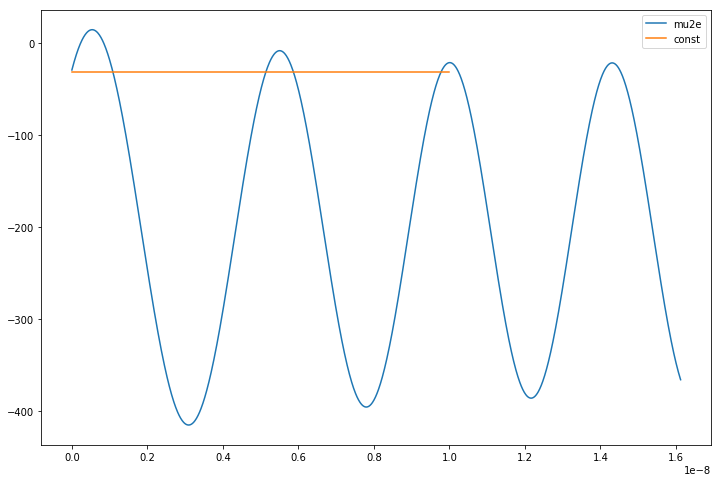

In [140]:
plt.plot(t,pd.DataFrame(X)[0],label='mu2e')
plt.plot(td,pd.DataFrame(Xd)[0],label='const')
plt.legend()

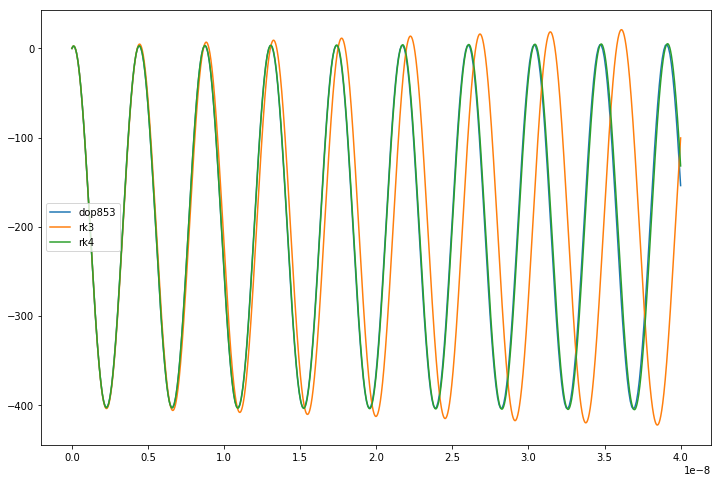

In [119]:
plt.plot(t,pd.DataFrame(X)[0],label='dop853')
plt.plot(t3,pd.DataFrame(X3)[0],label='rk3')
plt.plot(t4,pd.DataFrame(X4)[0],label='rk4')
plt.legend()

In [85]:
len(X)

30000

In [248]:
# select every 1000 steps, take a point
points = 300
stride = len(X) // points
Xp = X[::stride]
tp = t[::stride]
#Xp2 = Xd[::stride]
#tp2 = td[::stride]

In [249]:
x = pd.Series(Xp[:,0], name='X')
y = pd.Series(Xp[:,1], name='Y')
z = pd.Series(Xp[:,2], name='Z')
#x2 = pd.Series(Xp2[:,0], name='X')
#y2 = pd.Series(Xp2[:,1], name='Y')
#z2 = pd.Series(Xp2[:,2], name='Z')
#t = pd.Series(tp, name='T')

In [250]:
#len(Xp)

In [251]:
#fig = scatter3d(x,y,z,scale_list=[t],inline=True)

In [252]:
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines'
)
#trace2 = go.Scatter3d(
#    x=x2,
#    y=y2,
#    z=z2,
#    mode='lines'
#)

#data = [trace1,trace2]
data = [trace1]


fig = go.Figure(data=data)
iplot(fig)

In [41]:
df_test = pd.DataFrame([t,X[:,:3]])

In [42]:
rough_data = [X,t]

In [43]:
pkl.dump(rough_data, open("/home/ckampa/Coding/Mu2E_Extras/trajectory_01_lessmom.p", "wb"))

## Gen Run 01

In [207]:
# import data (first prepped in python 2)
df = pd.read_pickle(mu2e_ext_path+'root/ce_OLD.pkl')
# select good events only
df = df[df['de._status'] != -1000]

In [208]:
df = df.sample(n=200).reset_index(drop=True)

In [209]:
df['X0'] = df['demcgen_x']
df['Y0'] = df['demcgen_y']
df['Z0'] = df['demcgen_z']+10200.

In [210]:
df = df[['X0','Y0','Z0']]

In [211]:
df

X0         Y0           Z0
0    66.465820  -7.295485  5833.322754
1   -34.604736  23.075880  5677.804199
2    35.683594 -26.328606  5544.415527
3   -49.699463  27.189085  5544.408691
4   -25.668213  59.989273  5966.639648
5    55.166992 -25.546295  5788.884766
6    60.616699   3.578978  5588.841309
7    31.611572 -26.964762  6255.578125
8    38.190186  34.693359  6055.551758
9   -14.823242 -15.971301  6166.634766
10   27.019043   1.958685  5988.924805
11   36.913818 -15.556699  5500.016602
12   13.109619  18.439829  5566.690918
13    2.500000 -57.787971  5722.247559
14  -23.685791  44.787308  5788.924316
15   51.649414 -20.812248  5877.772949
16   49.165771 -26.845192  6011.086914
17    1.898438 -73.628296  5877.778320
18    6.065430  33.905788  6166.683105
19  -35.178711 -35.622665  5722.207520
20  -32.754150  31.615700  6255.537109
21  -20.170410 -28.274374  5522.198730
22  -23.913330 -23.491423  5855.602539
23  -48.090088 -27.888939  5611.075684
24   74.328369   9.280414  5833.289551
25   -3.971680  72.614136  5566.688477
26  -39.749268  55.150738  5744.413574
27  -17.101318 -24.012327  5900.014648
28  -18.562988 -34.941895  5744.410645
29   33.980957  58.104744  5766.710449
..         ...        ...          ...
170 -63.923096 -30.782724  5633.284180
171 -64.421875  15.919603  5655.556152
172  32.853516  63.466213  6211.100098
173  17.813721  12.367708  6011.086426
174 -29.761719  -4.292315  5988.924316
175  19.962158 -15.076538  6233.327637
176   4.566895 -59.267910  5633.311035
177 -26.890869   8.145711  5722.255371
178 -47.844971  11.279456  5588.915039
179  68.831055 -11.106783  5677.750000
180  23.693359  29.708609  6166.654297
181 -24.331787 -31.277985  5922.241699
182 -51.005127 -23.470936  6300.024414
183 -20.537842 -26.671923  6055.546387
184  27.656250 -18.907412  5788.839844
185 -33.197754  25.378578  5633.313965
186 -39.750977  26.698994  5611.074707
187  44.986328  50.080795  6011.129395
188   5.731201  26.766722  5855.587402
189  56.547119 -32.953197  5922.202148
190 -50.327148 -16.956337  6300.006348
191  24.276855  28.767374  5944.419922
192 -19.469482  69.841789  6166.631836
193  12.986572 -52.903694  6300.031738
194  30.028564  57.607437  5500.009277
195 -23.217773  32.738052  6099.988281
196  40.673828  56.455936  5611.125488
197  31.232910 -12.893142  6188.937012
198 -49.122314 -26.981035  6233.300781
199 -32.542725  -3.947679  5766.646973

[200 rows x 3 columns]

Great, now let's generate random theta and phi (from standard spherical coordinates) to denote the direction of the momentum vector. The magnitude is always 105 MeV!

In [212]:
df['Phi0'] = np.random.uniform(0,2*np.pi,200)

In [213]:
df['Theta0'] = np.random.uniform(0,np.pi,200)

In [214]:
mom = 105.

In [215]:
df['Px0'] = mom * np.sin(df['Theta0'])*np.cos(df['Phi0'])
df['Py0'] = mom * np.sin(df['Theta0'])*np.sin(df['Phi0'])
df['Pz0'] = mom * np.cos(df['Theta0'])
df['Pt0'] = mom * np.sin(df['Theta0'])

Let's check out our generated starting conditions!

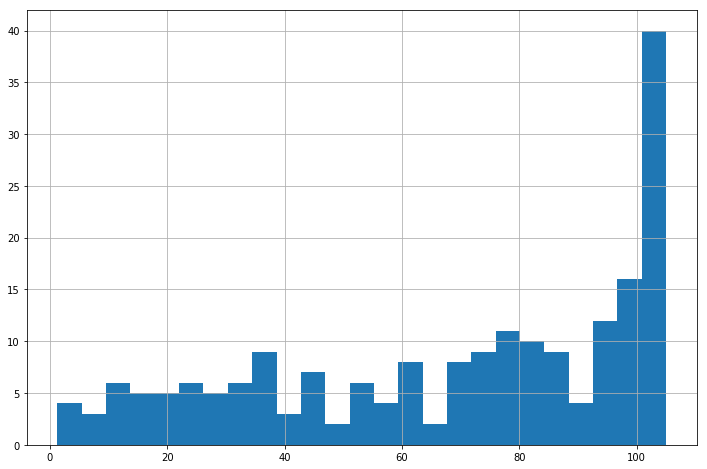

In [216]:
df.Pt0.hist(bins=25)

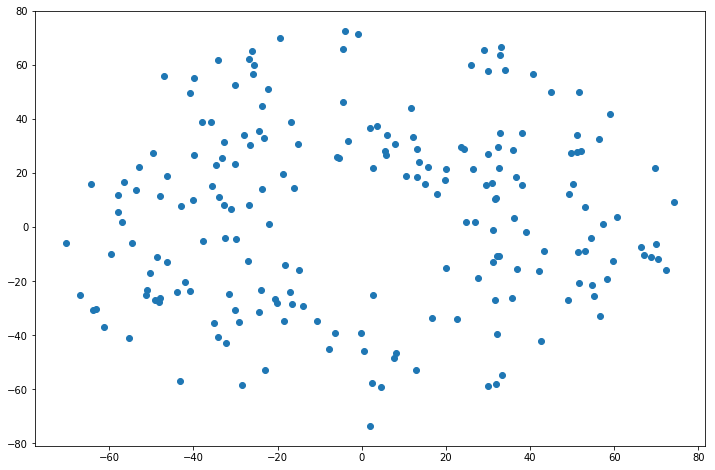

In [217]:
plt.scatter(x=df.X0,y=df.Y0)

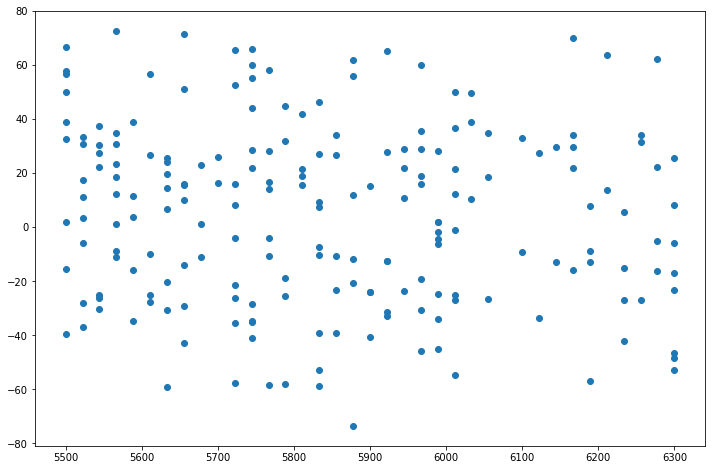

In [218]:
plt.scatter(x=df.Z0,y=df.Y0)

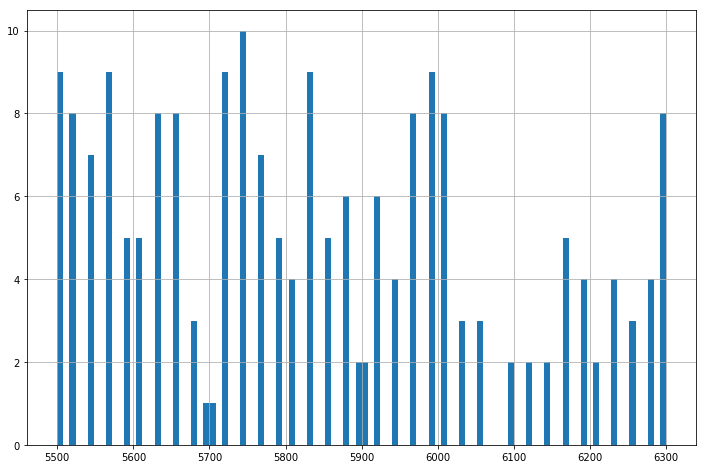

In [219]:
df.Z0.hist(bins=100)

In [220]:
df

X0         Y0           Z0      Phi0    Theta0         Px0  \
0    66.465820  -7.295485  5833.322754  0.810542  0.493572   34.280487   
1   -34.604736  23.075880  5677.804199  2.999818  1.648072 -103.636314   
2    35.683594 -26.328606  5544.415527  5.876432  1.180329   89.174697   
3   -49.699463  27.189085  5544.408691  1.253022  2.780731   11.583711   
4   -25.668213  59.989273  5966.639648  1.603715  1.247600   -3.276884   
5    55.166992 -25.546295  5788.884766  3.436827  2.326291  -73.125966   
6    60.616699   3.578978  5588.841309  1.277956  1.640347   30.237386   
7    31.611572 -26.964762  6255.578125  5.297421  2.598771   29.951713   
8    38.190186  34.693359  6055.551758  2.253839  2.331696  -47.994783   
9   -14.823242 -15.971301  6166.634766  4.291675  0.852184  -32.279108   
10   27.019043   1.958685  5988.924805  0.663621  2.850840   23.712342   
11   36.913818 -15.556699  5500.016602  3.830247  2.387113  -55.526086   
12   13.109619  18.439829  5566.690918  6.263430  0.897288   82.055973   
13    2.500000 -57.787971  5722.247559  5.179438  2.781592   16.654351   
14  -23.685791  44.787308  5788.924316  0.114598  1.843305  100.462066   
15   51.649414 -20.812248  5877.772949  4.288965  2.572158  -23.260734   
16   49.165771 -26.845192  6011.086914  4.559668  2.270218  -12.223128   
17    1.898438 -73.628296  5877.778320  1.249619  3.046145    3.158978   
18    6.065430  33.905788  6166.683105  4.148012  0.108920   -6.105214   
19  -35.178711 -35.622665  5722.207520  3.420795  0.825648  -74.185137   
20  -32.754150  31.615700  6255.537109  1.515186  2.718660    2.395339   
21  -20.170410 -28.274374  5522.198730  2.815808  2.075977  -87.051005   
22  -23.913330 -23.491423  5855.602539  5.812579  2.068807   82.218392   
23  -48.090088 -27.888939  5611.075684  0.963854  2.511741   35.275338   
24   74.328369   9.280414  5833.289551  4.154194  2.431625  -36.249650   
25   -3.971680  72.614136  5566.688477  5.404555  2.704940   28.339784   
26  -39.749268  55.150738  5744.413574  2.056492  0.314760  -15.174913   
27  -17.101318 -24.012327  5900.014648  2.516306  1.078940  -75.041561   
28  -18.562988 -34.941895  5744.410645  1.683535  0.445434   -5.089387   
29   33.980957  58.104744  5766.710449  5.021706  3.088088    1.709332   
..         ...        ...          ...       ...       ...         ...   
170 -63.923096 -30.782724  5633.284180  3.656712  1.611322  -91.299560   
171 -64.421875  15.919603  5655.556152  5.312379  0.567008   31.843477   
172  32.853516  63.466213  6211.100098  4.083594  2.354168  -43.757810   
173  17.813721  12.367708  6011.086426  4.891728  2.554233   10.379388   
174 -29.761719  -4.292315  5988.924316  4.550982  1.154212  -15.431140   
175  19.962158 -15.076538  6233.327637  4.426042  2.239344  -23.272699   
176   4.566895 -59.267910  5633.311035  5.989847  2.992727   14.907987   
177 -26.890869   8.145711  5722.255371  1.435145  2.996476    2.053395   
178 -47.844971  11.279456  5588.915039  2.835025  2.061642  -88.285534   
179  68.831055 -11.106783  5677.750000  6.105991  2.606971   52.661410   
180  23.693359  29.708609  6166.654297  0.023564  0.868835   80.153350   
181 -24.331787 -31.277985  5922.241699  5.213234  2.056281   44.591691   
182 -51.005127 -23.470936  6300.024414  4.797613  1.295457    8.601000   
183 -20.537842 -26.671923  6055.546387  4.886127  0.716081   11.914839   
184  27.656250 -18.907412  5788.839844  4.339414  1.803237  -37.231718   
185 -33.197754  25.378578  5633.313965  4.768909  0.670516    3.685743   
186 -39.750977  26.698994  5611.074707  0.910201  2.991519    9.632517   
187  44.986328  50.080795  6011.129395  1.333864  1.937587   23.006433   
188   5.731201  26.766722  5855.587402  5.273818  0.296153   16.314457   
189  56.547119 -32.953197  5922.202148  3.273080  1.473760 -103.603954   
190 -50.327148 -16.956337  6300.006348  0.332498  1.772713   97.232796   
191  24.276855  28.767374  5944.419922  4.631379  2.878190   -2.212271   
192 -19.469482  

Let's also dump the generating dataframe to pickle:

In [258]:
save_dir = "/home/ckampa/Coding/Mu2E_Extras/trajectory/run01/"
run_name = "trajectory_run01_10e-11step_Dop853_"

In [222]:
pkl.dump(df, open(save_dir+run_name+'INIT_COND.p','wb'))

Now we are ready to go!

In [223]:
timesteps = np.linspace(0,4e-8,4000)

In [257]:
for i,row in tqdm_notebook(enumerate(df.itertuples()), desc='particle #'):
    #print (i, row.X0)
    mom = np.array([row.Px0,row.Py0,row.Pz0])
    pos = np.array([row.X0,row.Y0,row.Z0])
    swimmer = ElectronSwimmer(mom,pos,fast_mag_calc_func,timesteps,'Dop853')
    X, t = swimmer.solve()
    df_out = pd.DataFrame(X,columns=['X','Y','Z','Vx','Vy','Vz'])
    df_out['time'] = t
    df_out['event'] = i
    df_out.event = df_out.event.astype('category')
    df_out['E0'] = swimmer.init_E
    df_out['EF'] = swimmer.final_E
    pkl.dump(df_out,open(save_dir+run_name+f"{i:03d}.p",'wb'))

swimming electron with [34.28048652 36.04923845 92.46783577] MeV, starting at [  66.46582031   -7.2954855  5833.32275391] mm, for 4e-08 s
Dop853 terminated at t=2.31758e-08
init energy: 105.00124342597074 MeV
final energy: 105.00135562797679 MeV
energy difference: 0.00011220200605066566 MeV (0.0001069%)
swimming electron with [-103.63631417   14.79221494   -8.10584747] MeV, starting at [ -34.60473633   23.07588005 5677.80419922] mm, for 4e-08 s
init energy: 105.00124342523245 MeV
final energy: 185.51794035935228 MeV
energy difference: 80.51669693411984 MeV (76.68%)
swimming electron with [ 89.17469656 -38.41433783  39.96513658] MeV, starting at [  35.68359375  -26.32860565 5544.41552734] mm, for 4e-08 s
init energy: 105.00124342646296 MeV
final energy: 106.65085334708841 MeV
energy difference: 1.6496099206254513 MeV (1.571%)
swimming electron with [ 11.58371097  35.21734593 -98.23724439] MeV, starting at [ -49.69946289   27.18908501 5544.40869141] mm, for 4e-08 s
Dop853 terminated at t

init energy: 105.00124342621686 MeV
final energy: 105.38402569250665 MeV
energy difference: 0.3827822662897944 MeV (0.3646%)
swimming electron with [-5.08938741 44.95197079 94.75451682] MeV, starting at [ -18.56298828  -34.94189453 5744.41064453] mm, for 4e-08 s
Dop853 terminated at t=2.30258e-08
init energy: 105.00124342597074 MeV
final energy: 105.00128442819707 MeV
energy difference: 4.1002226325304036e-05 MeV (3.905e-05%)
swimming electron with [   1.70933234   -5.3487685  -104.8497442 ] MeV, starting at [  33.98095703   58.10474396 5766.71044922] mm, for 4e-08 s
Dop853 terminated at t=5.90148e-09
init energy: 105.00124342547852 MeV
final energy: 105.00124342572462 MeV
energy difference: 2.461035819578683e-10 MeV (2.344e-10%)
swimming electron with [-83.43060744  58.65116566 -24.98748706] MeV, starting at [  36.70849609   18.63209152 6055.6015625 ] mm, for 4e-08 s
Dop853 terminated at t=3.30583e-08
init energy: 105.00124342597074 MeV
final energy: 337.5474262463252 MeV
energy diffe

Dop853 terminated at t=1.9855e-08
init energy: 105.00124342597074 MeV
final energy: 168.09511735532354 MeV
energy difference: 63.093873929352796 MeV (60.09%)
swimming electron with [-16.45519899 -14.87066467 102.63084214] MeV, starting at [  35.89941406   28.35767365 5744.48242188] mm, for 4e-08 s
Dop853 terminated at t=2.13353e-08
init energy: 105.00124342646296 MeV
final energy: 105.00124280504593 MeV
energy difference: -6.214170298335375e-07 MeV (-5.918e-07%)
swimming electron with [-16.84243558 -35.13108373  97.50456051] MeV, starting at [  42.26611328  -16.34338379 6277.72998047] mm, for 4e-08 s
Dop853 terminated at t=2.05351e-08
init energy: 105.00124342597074 MeV
final energy: 105.00124571426208 MeV
energy difference: 2.288291341301374e-06 MeV (2.179e-06%)
swimming electron with [12.4684991  84.84890687 60.58217175] MeV, starting at [  32.04492188   10.88514233 5944.40332031] mm, for 4e-08 s
Dop853 terminated at t=3.40485e-08
init energy: 105.00124342597074 MeV
final energy: 105

Dop853 terminated at t=2.08052e-08
init energy: 105.00124342498633 MeV
final energy: 105.00124343507666 MeV
energy difference: 1.0090332125400892e-08 MeV (9.61e-09%)
swimming electron with [ -13.70019863  -12.44425174 -103.35591495] MeV, starting at [  30.98803711   16.16235733 5699.96435547] mm, for 4e-08 s
Dop853 terminated at t=5.77144e-09
init energy: 105.00124342646296 MeV
final energy: 105.00124348109843 MeV
energy difference: 5.4635464152852364e-08 MeV (5.203e-08%)
swimming electron with [59.1903025  15.60069547 85.3119358 ] MeV, starting at [  42.54980469  -42.06604004 6233.28564453] mm, for 4e-08 s
Dop853 terminated at t=2.34659e-08
init energy: 105.00124342621686 MeV
final energy: 105.00198703427083 MeV
energy difference: 0.0007436080539662271 MeV (0.0007082%)
swimming electron with [-41.60750708 -94.87115589  17.12539447] MeV, starting at [2.65893555e+00 2.18406239e+01 6.16665918e+03] mm, for 4e-08 s
init energy: 105.00124342621686 MeV
final energy: 107.17266799555436 MeV
en

Dop853 terminated at t=5.87147e-09
init energy: 105.00124342646296 MeV
final energy: 105.00182834744007 MeV
energy difference: 0.0005849209771042752 MeV (0.0005571%)
swimming electron with [79.33693459 65.52815565 20.89764644] MeV, starting at [  38.20800781   15.59085655 5811.11035156] mm, for 4e-08 s
init energy: 105.00124342597074 MeV
final energy: 108.53382540800406 MeV
energy difference: 3.532581982033321 MeV (3.364%)
swimming electron with [76.5299564  66.64561524 26.95417858] MeV, starting at [5.74494629e+01 1.09739089e+00 5.67774268e+03] mm, for 4e-08 s
init energy: 105.00124342621686 MeV
final energy: 108.11675865069326 MeV
energy difference: 3.115515224476397 MeV (2.967%)
swimming electron with [ -0.53058082 -99.42801001  33.74595249] MeV, starting at [ -29.98925781   23.32741356 5566.65283203] mm, for 4e-08 s
init energy: 105.00124342572462 MeV
final energy: 107.44134586948553 MeV
energy difference: 2.4401024437609067 MeV (2.324%)
swimming electron with [ 26.32596663 -23.246

init energy: 105.00124342646296 MeV
final energy: 105.52159930236708 MeV
energy difference: 0.5203558759041158 MeV (0.4956%)
swimming electron with [-80.28567524  66.76934262 -11.00296491] MeV, starting at [-3.77744141e+01 -5.13981533e+00  6.27781152e+03] mm, for 4e-08 s
init energy: 105.00124342597074 MeV
final energy: 140.08860177049027 MeV
energy difference: 35.08735834451953 MeV (33.42%)
swimming electron with [ 26.66024285 -38.23554386  94.08652739] MeV, starting at [ -23.07080078  -52.80311966 5833.29736328] mm, for 4e-08 s
Dop853 terminated at t=2.27957e-08
init energy: 105.00124342547852 MeV
final energy: 105.00129209538541 MeV
energy difference: 4.866990688867645e-05 MeV (4.635e-05%)
swimming electron with [ 87.07347742 -48.84596438  32.5158622 ] MeV, starting at [  50.17041016   16.00096512 5722.18652344] mm, for 4e-08 s
init energy: 105.00124342646296 MeV
final energy: 107.00655233705689 MeV
energy difference: 2.005308910593925 MeV (1.91%)
swimming electron with [ 23.7232390

Dop853 terminated at t=5.02126e-09
init energy: 105.00124342547852 MeV
final energy: 105.00124342990843 MeV
energy difference: 4.429907107805775e-09 MeV (4.219e-09%)
swimming electron with [ 12.48994835 -34.30685379  98.44816389] MeV, starting at [  51.25952148   27.89591599 5922.26269531] mm, for 4e-08 s
Dop853 terminated at t=2.16054e-08
init energy: 105.00124342547852 MeV
final energy: 105.00124532861435 MeV
energy difference: 1.9031358249321784e-06 MeV (1.812e-06%)
swimming electron with [-91.29956033 -51.68455863  -4.25401968] MeV, starting at [ -63.9230957   -30.78272438 5633.28417969] mm, for 4e-08 s
init energy: 105.00124342621686 MeV
final energy: 156.33048970989498 MeV
energy difference: 51.32924628367812 MeV (48.88%)
swimming electron with [ 31.84347693 -46.54646652  88.56872716] MeV, starting at [ -64.421875     15.91960335 5655.55615234] mm, for 4e-08 s
Dop853 terminated at t=2.48462e-08
init energy: 105.00124342597074 MeV
final energy: 105.00205027623551 MeV
energy differ

Dop853 terminated at t=2.4096e-08
init energy: 105.00124342572462 MeV
final energy: 261.55814676076034 MeV
energy difference: 156.5569033350357 MeV (149.1%)
swimming electron with [ 53.58477784 -43.9526229   78.8786316 ] MeV, starting at [  31.23291016  -12.89314175 6188.93701172] mm, for 4e-08 s
Dop853 terminated at t=2.55864e-08
init energy: 105.00124342597074 MeV
final energy: 105.00534935057092 MeV
energy difference: 0.00410592460018222 MeV (0.00391%)
swimming electron with [   4.18098154    3.08886768 -104.87124625] MeV, starting at [ -49.12231445  -26.98103523 6233.30078125] mm, for 4e-08 s
Dop853 terminated at t=7.46187e-09
init energy: 105.00124342572462 MeV
final energy: 105.00124341588041 MeV
energy difference: -9.844214332588308e-09 MeV (-9.375e-09%)
swimming electron with [-42.63473135  94.78404968  14.94200819] MeV, starting at [-3.25427246e+01 -3.94767928e+00  5.76664697e+03] mm, for 4e-08 s
init energy: 105.00124342670907 MeV
final energy: 110.98359678953479 MeV
energy d

In [255]:
# testing it all worked for 1
df_out = pkl.load(open(save_dir+run_name+'000.p','rb'))

In [256]:
df_out

X           Y             Z            Vx            Vy  \
0      66.465820   -7.295485   5833.322754  9.787533e+10  1.029254e+11   
1      67.438190   -6.259770   5835.963511  9.654746e+10  1.041631e+11   
2      68.397202   -5.211763   5838.604303  9.520459e+10  1.053830e+11   
3      69.342709   -4.151642   5841.245130  9.384698e+10  1.065852e+11   
4      70.274563   -3.079586   5843.885992  9.247485e+10  1.077692e+11   
5      71.192621   -1.995779   5846.526889  9.108847e+10  1.089351e+11   
6      72.096741   -0.900401   5849.167821  8.968807e+10  1.100826e+11   
7      72.986785    0.206361   5851.808788  8.827390e+10  1.112115e+11   
8      73.862616    1.324323   5854.449790  8.684622e+10  1.123218e+11   
9      74.724099    2.453295   5857.090826  8.540526e+10  1.134132e+11   
10     75.571105    3.593090   5859.731897  8.395130e+10  1.144856e+11   
11     76.403502    4.743516   5862.373003  8.248457e+10  1.155389e+11   
12     77.221167    5.904381   5865.014144  8.100534e+10  1.165729e+11   
13     78.023974    7.075492   5867.655320  7.951387e+10  1.175875e+11   
14     78.811802    8.256654   5870.296530  7.801041e+10  1.185825e+11   
15     79.584533    9.447670   5872.937774  7.649523e+10  1.195579e+11   
16     80.342051   10.648343   5875.579054  7.496858e+10  1.205135e+11   
17     81.084242   11.858475   5878.220368  7.343073e+10  1.214491e+11   
18     81.810996   13.077865   5880.861717  7.188195e+10  1.223646e+11   
19     82.522205   14.306313   5883.503100  7.032249e+10  1.232600e+11   
20     83.217763   15.543615   5886.144518  6.875263e+10  1.241351e+11   
21     83.897568   16.789568   5888.785971  6.717263e+10  1.249899e+11   
22     84.561519   18.043969   5891.427459  6.558276e+10  1.258241e+11   
23     85.209519   19.306610   5894.068981  6.398329e+10  1.266377e+11   
24     85.841473   20.577286   5896.710538  6.237449e+10  1.274306e+11   
25     86.457290   21.855789   5899.352130  6.075664e+10  1.282027e+11   
26     87.056881   23.141911   5901.993756  5.913000e+10  1.289539e+11   
27     87.640158   24.435441   5904.635418  5.749485e+10  1.296841e+11   
28     88.207038   25.736170   5907.277114  5.585145e+10  1.303932e+11   
29     88.757440   27.043887   5909.918844  5.420010e+10  1.310812e+11   
...          ...         ...           ...           ...           ...   
2288  -87.991406  211.582712  11923.165336 -1.253114e+11 -5.554466e+10   
2289  -89.242454  211.021813  11925.832187 -1.248342e+11 -5.660638e+10   
2290  -90.488684  210.450315  11928.499044 -1.243480e+11 -5.766397e+10   
2291  -91.730005  209.868260  11931.165906 -1.238528e+11 -5.871736e+10   
2292  -92.966330  209.275689  11933.832774 -1.233487e+11 -5.976648e+10   
2293  -94.197567  208.672646  11936.499648 -1.228357e+11 -6.081124e+10   
2294  -95.423629  208.059174  11939.166528 -1.223139e+11 -6.185159e+10   
2295  -96.644428  207.435320  11941.833413 -1.217833e+11 -6.288743e+10   
2296  -97.859874  206.801127  11944.500305 -1.212438e+11 -6.391869e+10   
2297  -99.069881  206.156642  11947.167203 -1.206957e+11 -6.494531e+10   
2298 -100.274362  205.501911  11949.834107 -1.201388e+11 -6.596720e+10   
2299 -101.473229  204.836984  11952.501018 -1.195733e+11 -6.698430e+10   
2300 -102.666397  204.161907  11955.167935 -1.189991e+11 -6.799652e+10   
2301 -103.853778  203.476730  11957.834858 -1.184164e+11 -6.900381e+10   
2302 -105.035289  202.781502  11960.501788 -1.178252e+11 -7.000607e+10   
2303 -106.210843  202.076275  11963.168724 -1.172255e+11 -7.100325e+10   
2304 -107.380356  201.361099  11965.835668 -1.166173e+11 -7.199527e+10   
2305 -108.543744  200.636027  11968.502617 -1.160007e+11 -7.298206e+10   
2306 -109.700923  199.901111  11971.169574 -1.153758e+11 -7.396354e+10   
2307 -110.851809  199.156404  11973.836538 -1.147425e+11 -7.493965e+10   
2308 -111.996320  198.401961  11976.503509 -1.141011e+11 -7.591032e+10   
2309 -113.134373  197.637837  11979.170487 -1.134513e+11 -7.687547e+10   
2310 -114.265887  1

## Gen Run02
- 100 samples, 4/30, 10:00am-12pm

In [264]:
# import data (first prepped in python 2)
df = pd.read_pickle(mu2e_ext_path+'root/ce_OLD.pkl')
# select good events only
df = df[df['de._status'] != -1000]

In [265]:
df = df.sample(n=100).reset_index(drop=True)

df['X0'] = df['demcgen_x']
df['Y0'] = df['demcgen_y']
df['Z0'] = df['demcgen_z']+10200.

df = df[['X0','Y0','Z0']]

#df

#Great, now let's generate random theta and phi (from standard spherical coordinates) to denote the direction of the momentum vector. The magnitude is always 105 MeV!

#df['Phi0'] = np.random.uniform(0,2*np.pi,200)
df['Phi0'] = np.random.uniform(0,2*np.pi,100)

#df['Theta0'] = np.random.uniform(0,np.pi,200)
df['Theta0'] = np.random.uniform(0,np.pi,100)

mom = 105.

df['Px0'] = mom * np.sin(df['Theta0'])*np.cos(df['Phi0'])
df['Py0'] = mom * np.sin(df['Theta0'])*np.sin(df['Phi0'])
df['Pz0'] = mom * np.cos(df['Theta0'])
df['Pt0'] = mom * np.sin(df['Theta0'])


#Let's check out our generated starting conditions!

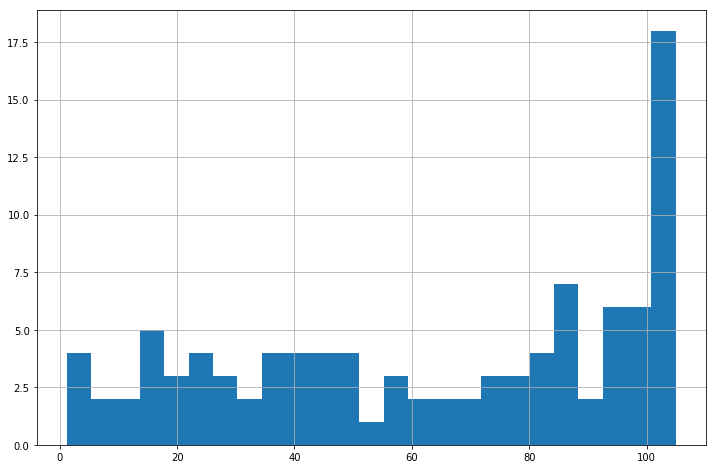

In [266]:
df.Pt0.hist(bins=25)

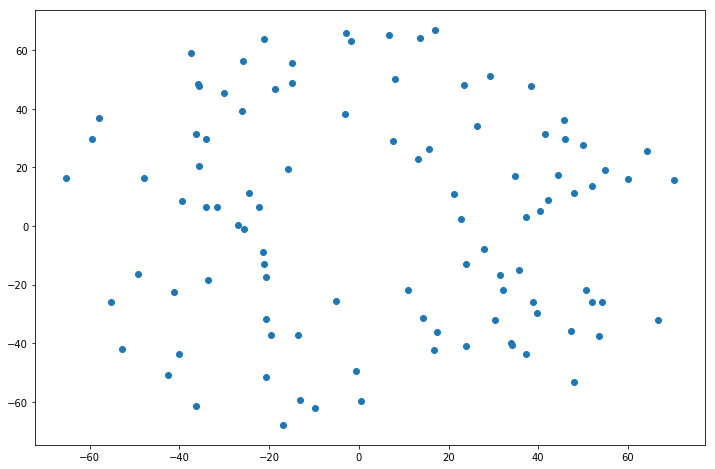

In [267]:
plt.scatter(x=df.X0,y=df.Y0)

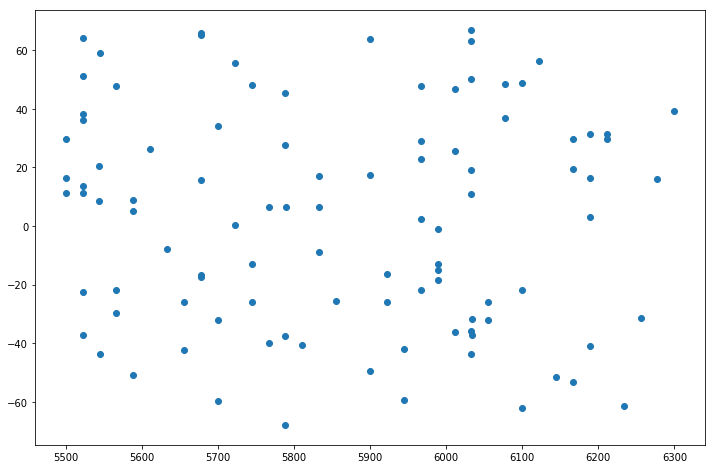

In [268]:
plt.scatter(x=df.Z0,y=df.Y0)

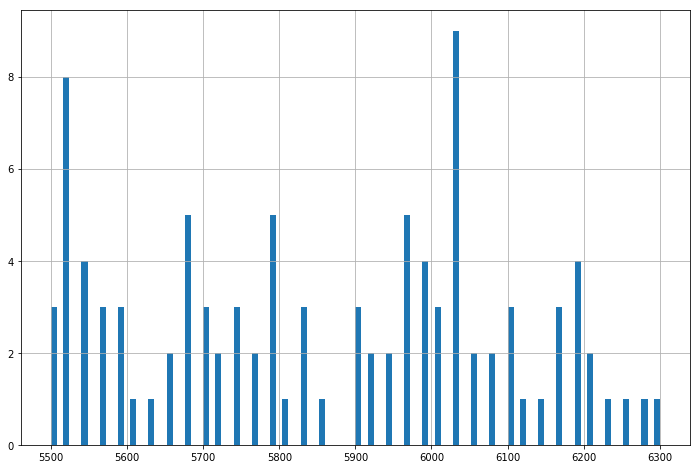

In [269]:
df.Z0.hist(bins=100)

In [270]:
df

X0         Y0           Z0      Phi0    Theta0        Px0  \
0   35.766846 -15.062604  5988.874512  0.686074  0.161757  13.084339   
1   33.882568 -40.009899  5766.684570  1.954927  2.276519 -29.950315   
2  -21.245605  63.679314  5900.019043  0.930688  2.929240  13.217738   
3  -20.621582 -51.464523  6144.421387  3.758293  2.522037 -49.739362   
4    6.625000  64.995178  5677.820312  0.988927  2.950381  10.967044   
5  -35.716797  20.475420  5544.443359  3.475871  1.362185 -97.037514   
6   37.334717 -43.805172  6033.313477  4.127475  3.021313  -6.956223   
7  -15.857666  19.288902  6166.643555  5.846700  0.403016  37.319503   
8   -0.636963 -49.593781  5900.033691  5.253454  2.663945  24.860150   
9  -14.985596  48.651993  6100.038574  3.262859  2.986559 -16.094358   
10  -5.142578 -25.675194  5855.553711  6.169245  1.925027  97.842358   
11 -20.745605 -17.393618  5677.812988  0.976303  1.427816  58.209282   
12 -42.526855 -50.839531  5588.903320  0.962885  0.580529  32.892192   
13 -37.405762  59.100266  5544.471191  3.961872  3.098416  -3.091006   
14  17.472412 -36.206017  6011.142578  5.479162  2.907051  16.930239   
15 -20.628174 -31.676044  6033.379883  0.253171  3.129886   1.190029   
16 -59.458740  29.770647  6211.148438  1.815653  2.179107 -20.887737   
17  29.193848  51.302608  5522.205566  5.005051  1.201917  28.255005   
18  45.683838  36.199356  5522.219238  0.855138  3.007701   9.196522   
19 -30.075928  45.314739  5788.853027  5.810967  1.817192  90.684785   
20  38.915527 -26.042688  5744.487793  0.731374  2.695843  33.691827   
21 -55.306885 -25.822697  6055.522461  3.485333  0.880383 -76.217489   
22  70.325439  15.685739  5677.799805  1.496271  1.606229   7.813039   
23  34.160400 -40.436466  5811.077637  6.043363  2.607401  51.930209   
24  15.715576  26.264650  5611.089355  2.511430  1.681344 -84.314957   
25  53.434814 -37.445358  5788.877441  5.755397  0.212095  19.095627   
26 -24.521484  11.168896  5500.026367  4.881566  1.777165  17.303838   
27 -25.713379  -1.165549  5988.886719  1.417823  0.474774   7.314010   
28  23.869141 -12.832022  5744.416504  3.849137  0.346693 -27.113788   
29  66.787598 -32.045902  5699.969238  1.607352  1.486955  -3.824001   
..        ...        ...          ...       ...       ...        ...   
70 -33.708740 -18.363886  5988.891113  0.446114  0.563296  50.580202   
71  50.052979  27.733572  5788.885254  5.299116  2.561173  31.878114   
72 -19.494873 -37.074032  5522.206055  1.350455  3.113266   0.649984   
73   7.635742  28.864681  5966.716797  5.155209  1.302630  43.383340   
74 -33.982422  29.549557  5499.998047  5.831531  0.454480  41.472469   
75 -58.036621  36.735699  6077.810547  3.821272  2.807255 -26.798290   
76  44.404541  17.283884  5899.970215  0.410353  2.793351  32.856118   
77  41.540039  31.404333  6188.867676  2.121998  1.737899 -54.223714   
78 -25.723389  56.150620  6122.187988  0.355455  2.263856  75.726518   
79 -31.647705   6.536503  5766.689941  5.356537  3.082905   3.698389   
80  60.049316  16.207649  6277.773926  3.885265  1.110052 -69.220203   
81 -22.234863   6.531226  5788.927246  4.011299  0.831452 -50.046668   
82 -18.759766  46.743546  6011.062012  0.954758  2.843096  17.841970   
83  47.850830 -53.297562  6166.661621  0.402512  2.890033  24.047261   
84 -35.644287  47.600586  5566.711426  1.726550  0.951724 -13.265299   
85  47.256836 -35.949963  6033.310059  3.972594  1.071028 -62.126988   
86  32.074463 -21.919962  5966.715820  5.292182  2.462997  36.108054   
87 -21.281250  -8.979872  5833.368652  4.272652  0.274819 -12.130003   
88 -41.308838 -22.578913  5522.262207  3.479434  3.076781  -6.416067   
89 -49.322754 -16.500984  5922.255859  0.509549  0.990121  76.637263   
90 -39.351074   8.376119  5544.395508  0.159234  2.690571  45.188946   
91  40.368408   5.042661  5588.878906  1.181188  2.694100  17.257083   
92 -13.504150 -37.168083  6033.371582  2.151420  1.094427 -51.184725   
93 -65.366211  16.281403  5499.951172  4.954275  0.

Let's also dump the generating dataframe to pickle:

In [271]:
save_dir = "/home/ckampa/Coding/Mu2E_Extras/trajectory/run02/"
run_name = "trajectory_run02_10e-11step_Dop853_"

In [272]:
pkl.dump(df, open(save_dir+run_name+'INIT_COND.p','wb'))

Now we are ready to go!

In [273]:
timesteps = np.linspace(0,4e-8,4000)

In [274]:
for i,row in tqdm_notebook(enumerate(df.itertuples()), desc='particle #'):
    #print (i, row.X0)
    mom = np.array([row.Px0,row.Py0,row.Pz0])
    pos = np.array([row.X0,row.Y0,row.Z0])
    swimmer = ElectronSwimmer(mom,pos,fast_mag_calc_func,timesteps,'Dop853')
    X, t = swimmer.solve()
    df_out = pd.DataFrame(X,columns=['X','Y','Z','Vx','Vy','Vz'])
    df_out['time'] = t
    df_out['event'] = i
    df_out.event = df_out.event.astype('category')
    df_out['E0'] = swimmer.init_E
    df_out['EF'] = swimmer.final_E
    pkl.dump(df_out,open(save_dir+run_name+f"{i:03d}.p",'wb'))

swimming electron with [ 13.08433938  10.71290491 103.62930923] MeV, starting at [  35.7668457   -15.06260395 5988.87451172] mm, for 4e-08 s
Dop853 terminated at t=2.02751e-08
init energy: 105.00124342646296 MeV
final energy: 105.00124342375578 MeV
energy difference: -2.707182034100697e-09 MeV (-2.578e-09%)
swimming electron with [-29.95031518  74.0958068  -68.10132183] MeV, starting at [  33.88256836  -40.00989914 5766.68457031] mm, for 4e-08 s
Dop853 terminated at t=9.17229e-09
init energy: 105.00124342646296 MeV
final energy: 106.83213722365761 MeV
energy difference: 1.8308937971946477 MeV (1.744%)
swimming electron with [  13.21773759   17.74879787 -102.64147109] MeV, starting at [ -21.24560547   63.67931366 5900.01904297] mm, for 4e-08 s
Dop853 terminated at t=6.49162e-09
init energy: 105.00124342597074 MeV
final energy: 105.00124379709821 MeV
energy difference: 3.711274700890499e-07 MeV (3.535e-07%)
swimming electron with [-49.73936248 -35.26220434 -85.48434223] MeV, starting at 

Dop853 terminated at t=2.24456e-08
init energy: 105.00124342621686 MeV
final energy: 105.00129919751572 MeV
energy difference: 5.577129886091825e-05 MeV (5.311e-05%)
swimming electron with [-27.11378807 -23.18954096  98.75265914] MeV, starting at [  23.86914062  -12.83202171 5744.41650391] mm, for 4e-08 s
Dop853 terminated at t=2.21355e-08
init energy: 105.00124342547852 MeV
final energy: 105.00124539924668 MeV
energy difference: 1.9737681640208393e-06 MeV (1.88e-06%)
swimming electron with [ -3.82400074 104.56127021   8.79305351] MeV, starting at [  66.78759766  -32.04590225 5699.96923828] mm, for 4e-08 s
init energy: 105.00124342547852 MeV
final energy: 115.16704208736564 MeV
energy difference: 10.165798661887123 MeV (9.682%)
swimming electron with [64.01585468 18.10623065 81.23505869] MeV, starting at [  54.27880859  -25.85707855 5655.59912109] mm, for 4e-08 s
Dop853 terminated at t=2.69867e-08
init energy: 105.00124342597074 MeV
final energy: 105.00792062412633 MeV
energy differenc

Dop853 terminated at t=2.88172e-08
init energy: 105.00124342547852 MeV
final energy: 105.02311111687003 MeV
energy difference: 0.021867691391506128 MeV (0.02083%)
swimming electron with [27.85372889 65.71948563 77.00726586] MeV, starting at [ -52.83276367  -41.9697113  5944.48486328] mm, for 4e-08 s
Dop853 terminated at t=2.72768e-08
init energy: 105.00124342597074 MeV
final energy: 105.01110946718843 MeV
energy difference: 0.00986604121769119 MeV (0.009396%)
swimming electron with [ 88.58997299  34.09900865 -44.87843908] MeV, starting at [-3.10351562e+00  3.80981560e+01  5.52221973e+03] mm, for 4e-08 s
Dop853 terminated at t=1.2073e-08
init energy: 105.00124342547852 MeV
final energy: 126.51898572006249 MeV
energy difference: 21.517742294583968 MeV (20.49%)
swimming electron with [-84.49872114 -22.98922706 -57.93497704] MeV, starting at [  39.73168945  -29.49418449 5566.68847656] mm, for 4e-08 s
Dop853 terminated at t=9.54239e-09
init energy: 105.00124342597074 MeV
final energy: 110.9

Dop853 terminated at t=7.49187e-09
init energy: 105.00124342597074 MeV
final energy: 105.00124714069112 MeV
energy difference: 3.7147203784115845e-06 MeV (3.538e-06%)
swimming electron with [-13.26529923  84.47862275  60.92941929] MeV, starting at [ -35.64428711   47.60058594 5566.71142578] mm, for 4e-08 s
Dop853 terminated at t=3.6039e-08
init energy: 105.00124342597074 MeV
final energy: 105.23399256898695 MeV
energy difference: 0.23274914301620697 MeV (0.2217%)
swimming electron with [-62.12698843 -68.06836614  50.31833502] MeV, starting at [  47.25683594  -35.94996262 6033.31005859] mm, for 4e-08 s
init energy: 105.00124342621686 MeV
final energy: 105.2942510498888 MeV
energy difference: 0.2930076236719401 MeV (0.2791%)
swimming electron with [ 36.10805401 -55.13752394 -81.73776293] MeV, starting at [  32.07446289  -21.91996193 5966.71582031] mm, for 4e-08 s
Dop853 terminated at t=8.47212e-09
init energy: 105.00124342646296 MeV
final energy: 105.15592421424026 MeV
energy difference:

In [275]:
# testing it all worked for 1
df_out = pkl.load(open(save_dir+run_name+'000.p','rb'))

In [276]:
df_out

X          Y             Z            Vx            Vy  \
0     35.766846 -15.062604   5988.874512  3.735752e+10  3.058676e+10   
1     36.138582 -14.754382   5991.834012  3.697021e+10  3.104135e+10   
2     36.506417 -14.441639   5994.793526  3.657755e+10  3.149080e+10   
3     36.870298 -14.124426   5997.753052  3.617962e+10  3.193504e+10   
4     37.230173 -13.802796   6000.712592  3.577650e+10  3.237402e+10   
5     37.585990 -13.476801   6003.672145  3.536825e+10  3.280769e+10   
6     37.937698 -13.146496   6006.631711  3.495494e+10  3.323598e+10   
7     38.285247 -12.811934   6009.591290  3.453665e+10  3.365885e+10   
8     38.628587 -12.473169   6012.550883  3.411346e+10  3.407623e+10   
9     38.967671 -12.130257   6015.510488  3.368543e+10  3.448807e+10   
10    39.302449 -11.783254   6018.470107  3.325264e+10  3.489432e+10   
11    39.632874 -11.432215   6021.429739  3.281516e+10  3.529493e+10   
12    39.958900 -11.077198   6024.389385  3.237307e+10  3.568984e+10   
13    40.280482 -10.718259   6027.349043  3.192645e+10  3.607902e+10   
14    40.597574 -10.355456   6030.308715  3.147537e+10  3.646240e+10   
15    40.910132  -9.988848   6033.268400  3.101991e+10  3.683994e+10   
16    41.218113  -9.618493   6036.228099  3.056015e+10  3.721160e+10   
17    41.521474  -9.244450   6039.187811  3.009615e+10  3.757733e+10   
18    41.820173  -8.866778   6042.147537  2.962802e+10  3.793709e+10   
19    42.114169  -8.485538   6045.107275  2.915581e+10  3.829083e+10   
20    42.403422  -8.100790   6048.067028  2.867961e+10  3.863850e+10   
21    42.687892  -7.712595   6051.026793  2.819950e+10  3.898008e+10   
22    42.967540  -7.321014   6053.986572  2.771556e+10  3.931551e+10   
23    43.242329  -6.926109   6056.946365  2.722787e+10  3.964476e+10   
24    43.512221  -6.527941   6059.906171  2.673650e+10  3.996780e+10   
25    43.777181  -6.126574   6062.865991  2.624155e+10  4.028458e+10   
26    44.037172  -5.722069   6065.825824  2.574308e+10  4.059506e+10   
27    44.292160  -5.314491   6068.785671  2.524119e+10  4.089922e+10   
28    44.542111  -4.903902   6071.745531  2.473595e+10  4.119702e+10   
29    44.786991  -4.490366   6074.705405  2.422745e+10  4.148842e+10   
...         ...        ...           ...           ...           ...   
1998  32.904961 -27.974035  11914.037500  3.711228e+10  2.196046e+10   
1999  33.275241 -27.752791  11917.004953  3.692473e+10  2.227700e+10   
2000  33.643631 -27.528389  11919.972404  3.673451e+10  2.259193e+10   
2001  34.010106 -27.300845  11922.939853  3.654162e+10  2.290524e+10   
2002  34.374637 -27.070176  11925.907299  3.634609e+10  2.321690e+10   
2003  34.737200 -26.836397  11928.874744  3.614792e+10  2.352690e+10   
2004  35.097768 -26.599526  11931.842187  3.594713e+10  2.383520e+10   
2005  35.456314 -26.359579  11934.809628  3.574374e+10  2.414179e+10   
2006  35.812813 -26.116575  11937.777066  3.553776e+10  2.444665e+10   
2007  36.167238 -25.870530  11940.744502  3.532921e+10  2.474975e+10   
2008  36.519565 -25.621462  11943.711936  3.511809e+10  2.505108e+10   
2009  36.869767 -25.369389  11946.679368  3.490443e+10  2.535061e+10   
2010  37.217820 -25.114329  11949.646797  3.468824e+10  2.564831e+10   
2011  37.563697 -24.856300  11952.614224  3.446953e+10  2.594418e+10   
2012  37.907375 -24.595322  11955.581649  3.424833e+10  2.623818e+10   
2013  38.248827 -24.331412  11958.549071  3.402464e+10  2.653030e+10   
2014  38.588029 -24.064589  11961.516491  3.379848e+10  2.682051e+10   
2015  38.924957 -23.794874  11964.483908  3.356987e+10  2.710880e+10   
2016  39.259586 -23.522284  11967.451323  3.333883e+10  2.739515e+10   
2017  39.591893 -23.246840  11970.418736  3.310537e+10  2.767952e+10   
2018  39.921851 -22.968562  11973.386146  3.286951e+10  2.796191e+10   
2019  40.249439 -22.687469  11976.353553  3.263126e+10  2.824230e+10   
2020  40.574632 -22.403582  11979.320958  3.239064e+10  2.852065e+10   
2021  40.897406 -22.116920  11982.288360  3.214768e+10

## Junk

### Dummy break

In [346]:
###solver = getattr(odespy,'Dop853')(lorentz_force,f_args=(mag_calc_func,), rtol=1e-5, atol=1e-5)

In [347]:
solver

Dop853(f=lorentz_force, f_args=(<function mag_calc_func at 0x7f46cde60620>,), f_kwargs={}, complex_valued=False, jac_args=(), jac_kwargs={}, verbose=0, disk_storage=False, u_exact=NoneType, atol=1e-05, rtol=1e-05, nsteps=1000, ifactor=2, dfactor=0.5, safety=0.9)

In [299]:
from mu2e.tools.particletransport import *

In [348]:
solver.set_initial_condition([pos[0],pos[1],pos[2],mom[0],mom[1],mom[2]])

In [356]:
solver.solve(np.linspace(0,5e-8,5),terminate)

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning:

dop853: larger nsteps is needed



/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning:

dop853: step size becomes too small

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning:

dop853: step size becomes too small

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning:

dop853: step size becomes too small



(array([[   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.]]),
 array([0.00e+00, 1.25e-08, 2.50e-08, 3.75e-08, 5.00e-08]))

In [350]:
_

(array([[   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.],
        [   0.,    0., 6000.,   10.,   60.,   10.]]),
 array([0.00000000e+00, 1.11111111e-10, 2.22222222e-10, 3.33333333e-10,
        4.44444444e-10, 5.55555556e-10, 6.66666667e-10, 7.77777778e-10,
        8.88888889e-10, 1.00000000e-09]))

In [351]:
X, t = _

In [352]:
X

array([[   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.],
       [   0.,    0., 6000.,   10.,   60.,   10.]])

### Generating fine grid from model

In [ ]:
x = np.linspace(-700,700,141)
y = np.linspace(-700,700,141)
z = np.linspace(5000,12000,701)
XX,YY,ZZ = np.meshgrid(x,y,z)

In [183]:
pd.DataFrame([XX.flatten(),YY.flatten(),ZZ.flatten()])

KeyboardInterrupt: 

### Testing RK4 nans

In [167]:
def rk4(fa, voltages, x0, v0, charge_mass_ratio, dt):
    """ Use the fourth order Runge Kutta algorithm to find the position and
    velocity at t = t + dt of a charged particle in an electric field.
        Parameters
        ----------
        fa                :: FastAdjust
        vol_t             :: func(t), returns np.array([v0, v1, ... vn]) (V)
        t                 :: float64                                     (s)
        x0                :: np.array([x, y, z])                         (m)
        v0                :: np.array([vx, vy, vz])                      (m / s)
        charge_mass_ratio :: float64                                     (C / kg)
        dt                :: float64                                     (s)
        Returns
        -------
        position and velocity at t = t + dt ::
            np.array([x, y, z]), np.array([vx, vy, vz])
        http://doswa.com/2009/01/02/fourth-order-runge-kutta-numerical-integration.html
    """
    a0 = acceleration(fa, voltages, x0, charge_mass_ratio)

    x1 = x0 + 0.5 * v0 * dt
    v1 = v0 + 0.5 * a0 * dt
    a1 = acceleration(fa, voltages, x1, charge_mass_ratio)

    x2 = x0 + 0.5 * v1 * dt
    v2 = v0 + 0.5 * a1 * dt
    a2 = acceleration(fa, voltages, x2, charge_mass_ratio)

    x3 = x0 + v2 * dt
    v3 = v0 + a2 * dt
    a3 = acceleration(fa, voltages, x3, charge_mass_ratio)

    x4 = x0 + (dt/6.0)*(v0 + 2*v1 + 2*v2 + v3)
    v4 = v0 + (dt/6.0)*(a0 + 2*a1 + 2*a2 + a3)

    return x4, v4


In [70]:
from mu2e.tools.particletransport import *

In [71]:
lorentz_force([0,0,6000,10,60,10],np.linspace(0,1e-9,100),fast_mag_calc_func)

array([ 1.00000000e+01,  6.00000000e+01,  1.00000000e+01,  4.97193408e+13,
       -8.27782724e+13,  4.46950294e+14])

In [72]:
def update_kinematics(p_vec_0,v_vec_0,dt):
# RK4
    k1 = dt*calc_lorentz_accel(v_vec_0,mag_field_function(p_vec_0[0],p_vec_0[1],p_vec_0[2],True))
    l1 = dt*v_vec_0
    x1 = p_vec_0+l1*0.5
    v1 = v_vec_0+k1*0.5
    k2 = dt*calc_lorentz_accel(v1,mag_field_function(x1[0],x1[1],x1[2],True))
    l2 = dt*(v_vec_0+k1*0.5)
    x2 = p_vec_0+l2*0.5
    v2 = v_vec_0+k2*0.5
    k3 = dt*calc_lorentz_accel(v2,mag_field_function(x2[0],x2[1],x2[2],True))
    l3 = dt*(v_vec_0+k2*0.5)
    x3 = p_vec_0+l3
    v3 = v_vec_0+k3
    k4 = dt*calc_lorentz_accel(v3,mag_field_function(x3[0],x3[1],x3[2],True))
    l4 = dt*(v_vec_0+k3)
    
    print('ks',k1,k2,k3,k4)
    print('ls',l1,l2,l3,l4)
    
    v_vec_1 = v_vec_0+(1/6.0)*(k1+2*k2+2*k3+k4)
    p_vec_1 = p_vec_0+(1/6.0)*(l1+2*l2+2*l3+l4)*1e3
    return (p_vec_1,v_vec_1)


In [76]:
update_kinematics(np.array([0,0,6.]),np.array([10,60,10]),dt=3e-12)

ks [-3.71988929e+05  6.19764055e+04  1.30496210e+02] [-1.92493095e+08 -1.15306937e+09  8.50514310e+04] [ 3.57440150e+12 -5.96709730e+11 -1.24480073e+09] [nan nan nan]
ls [3.0e-11 1.8e-10 3.0e-11] [-5.57953393e-07  9.31446082e-08  2.25744315e-10] [-2.88739612e-04 -1.72960387e-03  1.27607146e-07] [ 1.07232045e+01 -1.79012919e+00 -3.73440216e-03]


(array([1787.10431648, -298.93136857,    5.37764226]), array([nan, nan, nan]))

In [159]:
# now try in meters
#c = 29979245.8 # 10 m
c = 299792458 # m
#c = 299792458000 # mm

In [80]:
update_kinematics(np.array([0,0,6.]),np.array([10,60,10]),dt=1e-11)

ks [-1.23996310e+06  2.06588018e+05  4.34987367e+02] [-2.13591921e+09 -1.28123657e+10  9.45193891e+05] [ 1.32359434e+14 -2.20653320e+13 -4.60953336e+10] [nan nan nan]
ls [1.e-10 6.e-10 1.e-10] [-6.19971548e-06  1.03354009e-06  2.27493683e-09] [-1.06795960e-02 -6.40618277e-02  4.72606945e-06] [ 1.32359434e+03 -2.20653320e+02 -4.60953336e-01]


(array([ 2.20595495e+05, -3.67969069e+04, -7.08239799e+01]),
 array([nan, nan, nan]))

In [191]:
8e-8 / 6e-11

1333.3333333333333

In [198]:
8e-8 / 3e-12

26666.666666666664

In [215]:
gamma(np.array([10,60,10]))

1.0

In [168]:
me = 0.511
init_mom = np.array([0,0,105])
init_v = (np.dot(init_mom,init_mom))/me)**2/(1+ np.dot(init_mom,init_mom)*(1/me)**2 / c**2))**(1/2)
#init_v = init_mom/(0.511*np.sqrt(1+np.dot(init_mom,init_mom)/0.511**2))*c
#init_v = init_mom/(0.511)*c

In [169]:
beta = init_v/c
beta

6.85405675064535e-07

In [170]:
gamma(init_v)

1.0

In [167]:
gamma(init_v)

1.000000499988533

In [270]:
1/np.sqrt(1-np.dot(beta,beta))

1.0000000021384088